# AirBnB and Zillow Analysis
**Authors - Debparna Das and Abdullah Ansari**



**Analyzing data from AirBnB and Zillow Group, Inc.**

*Problem Statement: Zillow, a real estate company, would like to invest in New York City. However, they need to rent out their properties through AirBnb and have already opted to invest in two-bedroom properties through short-term rentals. We are given the cost data set from Zillow spanning across 22 years and the revenue data set from AirBnb. Our goal is to analyze these data sets and to propose the most-profitable zip codes in New York City for Zillow to invest in. Data set and problem definition has been sourced from Kaggle.*

*Assumptions: We have taken the following assumptions:<br>
•	We will not take into account any inflation/deflation on property cost <br>
•	All properties and all square feet within each locale are assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale) <br>
•	The economy is assumed to be stable and we are not accounting for changes/fluctuations in the strength of dollar while creating the data product <br>
•	In the real world, short-term rentals in AirBnB have some seasonality involved. Christmas and New Years season may be a peak time when occupancies are high, or if they are hosting the Super Bowl, the city's bookings will spike. However, we are not incorporating any seasonality in our analysis and calculations for now <br>
•	It has been assumed that Zillow will charge the same prices from the listings as AirBnB has been charging, and Zillow will provide the 2-bedrooms for rent throughout the year <br>
•	There is a field in the AirBnB listings file called 'availability_365' which indicates the number of days each property is available for rent within the next 365 days. It has been assumed that this data will not change in the next 365 days due to any external factors, and Zillow can capitalize on the rate of occupancy of these properties as deduced from their availability over the year (calculations depicted later in the report).*

## Relevant Packages

**Importing the required packages for data cleaning, imputation, visualization, and analysis**

In [1]:
import pandas as pd #offers data structures and operations for data manipulation and analysis
import copy #Assignment statements in Python do not copy objects, they create bindings between a target and an object.
#A deepcopy method from copy library is sometimes needed so I change one copy without changing the other. Ref. [1]#
from sklearn.feature_selection import VarianceThreshold #To remove all features whose variance doesn’t meet some threshold. 
#By default, it removes all zero-variance features, 
#i.e. features that have the same value in all samples. Ref. [2]#
from sklearn import preprocessing #for data standardization, or mean removal and variance scaling
import matplotlib.pyplot as plt #for programmatic plotting
import seaborn as sns #used with pandas & matplotlib for making statistical graphics
import numpy as np #for scientific calculations
import missingno as msno #to visualize the pattern of occurrence of missing values in dataset
import pandas_profiling as pp #to provide statistical profiling of datasets for quick analysis
%matplotlib inline 
#to render outputs of plotting commands within Jupyter notebook, where I am coding my data product

**We'll perform data cleansing and data munging operations on both data sets separately**

## Working on AirBnb data (listings.csv)

In [2]:
listings_df = pd.read_csv("listings.csv") #reading in the CSV file in a dataframe

C:\Users\debpa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Displaying the top 5 rows in this listings_df dataframe**

In [3]:
listings_df.head() #head function returns top 5 rows

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
2,1886820,https://www.airbnb.com/rooms/1886820,20170502132028,2017-05-04,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
3,6627449,https://www.airbnb.com/rooms/6627449,20170502132028,2017-05-05,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10.0,f,NaN,NaN,f,strict,f,f,1,0.54
4,5557381,https://www.airbnb.com/rooms/5557381,20170502132028,2017-05-04,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,10.0,f,NaN,NaN,t,moderate,f,f,1,3.63


**Displaying all the 95 columns and their corresponding datatypes in listings.csv to decide on next course of action**

In [4]:
listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

**Looking for unique country codes in the data by filtering out duplicate values**

In [5]:
list(listings_df['country_code'].drop_duplicates())

['US', 'UY']

**Keeping only US values and removing UY values as we have to target only New York City**

In [6]:
listings_df = listings_df.loc[listings_df['country_code'] == 'US']

**Looking at the data to find out unique room types offered for rent by AirBnB**

In [7]:
list(listings_df['room_type'].drop_duplicates())

['Private room', 'Entire home/apt', 'Shared room']

**Our hypothesis being, Zillow can only possibly invest in entire homes and/or apartments, we'll drop other room types from the data. As a real estate company, they would probably not be able to invest in someone's private room or in shared rooms**

In [8]:
listings_df = listings_df.loc[listings_df['room_type'] == 'Entire home/apt']

**Given that Zillow has already decided that 2-bedroom apartments are the most profitable, we'll remove all other records having the count of bedrooms not equal to 2**

In [9]:
listings_df = listings_df.loc[listings_df['bedrooms'] == 2]

**Listing the unique states in the updated dataframe**

In [10]:
list(listings_df['state'].drop_duplicates())

['NY']

**It just has values for the state of New York, which is good. Now, we'll check for the cities**


In [11]:
list(listings_df['city'].drop_duplicates())

['Bronx',
 'New York',
 'Astoria',
 'Queens',
 'astoria, queens',
 'Astoria, New York',
 'Staten Island',
 'Arverne',
 'Rockaway Beach',
 'Astoria, Queens',
 'Astoria ',
 'ASTORIA',
 'Long Island City',
 'astoria',
 'Brooklyn',
 'BAYSIDE',
 'Brooklyn ',
 'Brooklyn, New York',
 'New York City',
 'Belle Harbor ',
 'Floral Park',
 'Bellerose ',
 'Brookyn ',
 'brooklyn\n',
 'Chelsea, New York',
 'New York ',
 'Brooklyn NY',
 'Crown Heights ',
 nan,
 'East Elmhurst ',
 'EAST ELMHURST',
 'East elmhurst',
 'NY',
 'Elmhurst ',
 'flushing',
 'Far Rockaway',
 'Flushing ',
 'Flushing',
 'Forest Hills',
 'Fort Greene, Brooklyn',
 'Fresh Meadows',
 'Fresh Meadows ',
 'Glendale',
 'Greenpoint, Brooklyn',
 'jackson heights',
 'Jackson Heights',
 'Jamaica ',
 'Jamaica',
 'flushing ',
 'Long Island city',
 'long island city',
 'LONG ISLAND CITY',
 'Bronx ',
 'MASPETH ',
 'MIDDLE VILLAGE',
 'new york',
 'Brooklyn, new York ',
 'Park Slope, Brooklyn',
 'Ridgewood ',
 'Ridgewood',
 'Bushwick ',
 'Bushwick

**We observe that the filtered data only has New York City components (the 5 boroughs of New York City, namely: Manhattan, The Bronx, Staten Island, Queens, and Brooklyn). We don't have to filter anything out from this. So, we proceed to further data cleaning**

**Some of the columns which have dollar values, have the dollar symbol as a prefix. This is redundant as we don't need that extra bit in each value of the columns. Also, it would hinder our numerical calculations and comparisons. So, we have created a function to replace the dollar symbols with whitespace, and convert all values to float datatype**

In [12]:
def transformRateCol(dfCol):
    dfCol.fillna(" ", inplace = True) 
    col = dfCol.apply(lambda x: x.replace('$','')) #removing the dollar symbols
    col = col.apply(pd.to_numeric,errors='coerce')
    return col

**Applying our transformRateCol function to remove dollar symbols from the price fields. All the cleaned data is being stored in the listings_df dataframe that we have created to maintain a cleaned version of the relevant data**

In [13]:
listings_df['price'] = transformRateCol(listings_df['price'])
listings_df['weekly_price'] = transformRateCol(listings_df['weekly_price'])
listings_df['monthly_price'] = transformRateCol(listings_df['monthly_price'])
listings_df['security_deposit'] = transformRateCol(listings_df['security_deposit'])
listings_df['cleaning_fee'] = transformRateCol(listings_df['cleaning_fee'])
listings_df['extra_people'] = transformRateCol(listings_df['extra_people'])

**We'll need to perform analysis to remove irrelevant columns from the listings.csv dataset. We have seen above that many columns have object (string) datatypes which would make it difficult to perform statistical computations on them. So, we will be convert them to numerical datatypes. This is done to manipulate data by removing fields where the variance is 20% or less. For example, the country field just has 'US' and 'UY', 'bed_type' field just has 5 different types of beds. These are not going to help us in our analysis for this case.We'll remove columns which add little or no value to our analysis. Please note: we have separated 'zipcode' column from our variance calculation as it is pivotal for our analysis**

In [14]:
features = set(list(listings_df.select_dtypes(include=[object]).columns.values))-{'zipcode'}

In [15]:
transformed_df = copy.deepcopy(listings_df) #creating new dataframe transformed_df for variance calculations
transformed_df = transformed_df.fillna('0') #replacing null values with zeroes to facilitate variance calculation


In [16]:
for feature in features:
    le = preprocessing.LabelEncoder() #LabelEncoder transforms non-numerical labels to numerical labels
    le = le.fit(transformed_df[feature]) 
    transformed_df[feature] = le.transform(transformed_df[feature])
transformed_df = transformed_df.apply(pd.to_numeric, errors='coerce')
transformed_df.fillna(0, inplace=True)
sel = VarianceThreshold(threshold = 0.8) #returns columns that have 80% variance or more
sel.fit(transformed_df)
x = transformed_df[transformed_df.columns[sel.get_support(indices=True)]] #this variable contains list of columns that have at least 80% variance

**We plan on keeping all columns having at least 80% variance. All columns having variance of 20% or below are listed below. These columns will be removed from the analysis**

In [17]:
sorted(list(set(list(listings_df.columns.values)) - set(list(x.columns.values)))) 

['bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calendar_last_scraped',
 'country',
 'country_code',
 'experiences_offered',
 'has_availability',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'license',
 'longitude',
 'market',
 'neighbourhood_group_cleansed',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'state']

**Next, dropping columns containing 'url' or 'host' in their names as these are not relevant for Zillow's analysis. The hosts may change after Zillow invests in the properties**

In [18]:
drop_col = []
for col_name in list(x.columns.values):
    if 'url' in col_name or col_name.startswith('host'):
        drop_col.append(col_name)

x = x.drop(drop_col, axis=1)

**Columns containing only textual information are removed as they do not provide any variation for analysis. For quantitative analysis purposes, we need the numbers, not the text data. The texts may be helpful as additional data points to decide on the exact properties that Zillow would invest in to maximize their returns**

In [19]:
drop_col2 = ['name','summary','space','description','neighborhood_overview','notes','transit','access','interaction','house_rules','amenities','guests_included','minimum_nights', 'maximum_nights', 'calendar_updated','first_review', 'last_review','calculated_host_listings_count','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_location']
x = x.drop(drop_col2, axis=1)

**Dropping 'neighbourhood' as the data also contains 'neighbourhood_group_cleansed' column which is similar. Dropping 'square_feet' as it contains very high number of null values**

In [20]:
x = x.drop(['neighbourhood','square_feet'], axis=1)

**Final list of columns; adding back 'neighbourhood_group_cleansed' manually as we need this column for our analysis purposes**

In [21]:
final_list = list(x.columns.values)
final_list.append('neighbourhood_group_cleansed')

In [22]:
final_list

['id',
 'street',
 'neighbourhood_cleansed',
 'city',
 'zipcode',
 'smart_location',
 'property_type',
 'accommodates',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_value',
 'cancellation_policy',
 'reviews_per_month',
 'neighbourhood_group_cleansed']

In [23]:
listings_df = listings_df[final_list] #updating listings_df dataframe to be keep the cleansed data 

**Creating a visual representation of the number of null values in the columns of the updated dataframe** 

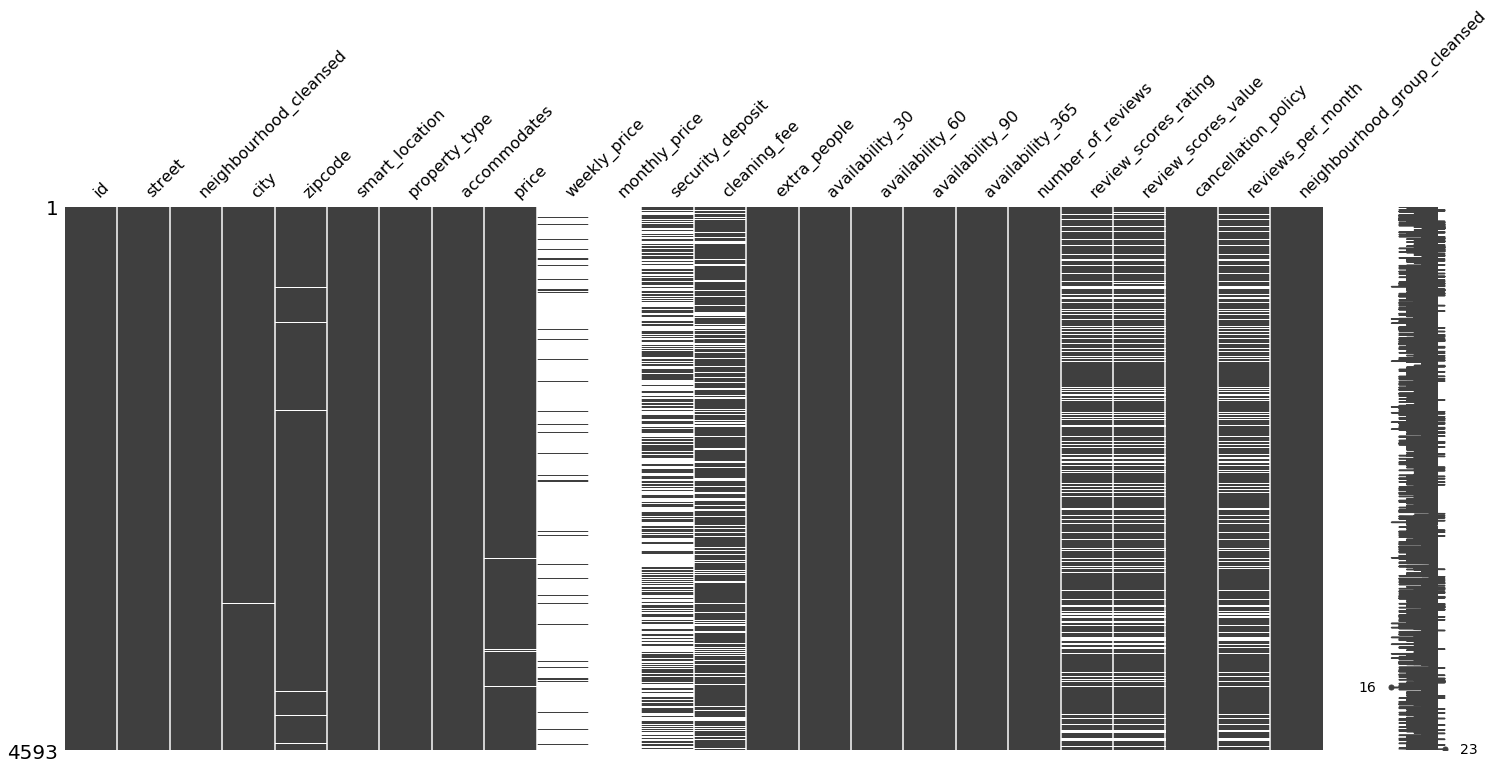

In [24]:
msno.matrix(listings_df)

**From the above graph, it can be seen that most of the columns have non-null values. However, the pivotol column zip code contains some null values. We have imputed this column based on the non-null values corresponding to the column 'neighbourhood_cleansed'. This is because neighbourhood_cleansed has no null values and gives us corresponding zip code values for different categories of neighbourhoods**

In [25]:
listings_df['zipcode'] = listings_df.zipcode.apply(pd.to_numeric, errors='coerce')
listings_df['neighbourhood_cleansed'] = listings_df['neighbourhood_cleansed'].str.capitalize().str.strip()
new_df = copy.deepcopy(listings_df)
new_df = new_df[['neighbourhood_cleansed','zipcode']].dropna()
new_df = new_df.assign(COUNT = new_df.groupby(['neighbourhood_cleansed','zipcode'])['neighbourhood_cleansed'].transform('count')) 
new_df = new_df.drop_duplicates()
idx = new_df.groupby(['neighbourhood_cleansed'])['COUNT'].transform(max) == new_df['COUNT'] #COUNT stores the maximum count of zipcodes in a neighbourhood
new_df = new_df[idx]
new_df = new_df.drop('COUNT',axis=1)
zip_dict = {}

for index, row in new_df.iterrows():
    if row['neighbourhood_cleansed'] not in zip_dict:
        zip_dict[row['neighbourhood_cleansed']] = row['zipcode'] #creating a mapping dictionary for each neighbourhood and its corresponding zipcode
        
listings_df.zipcode = listings_df.zipcode.fillna(listings_df.neighbourhood_cleansed.map(zip_dict)) #getting rid of the null values in zipcode field by putting in the zipcode value which has the highest number of occurrence in that neighbourhood
listings_df['zipcode'] =listings_df.zipcode.apply(lambda x: int(x)) #converting zipcode to integer

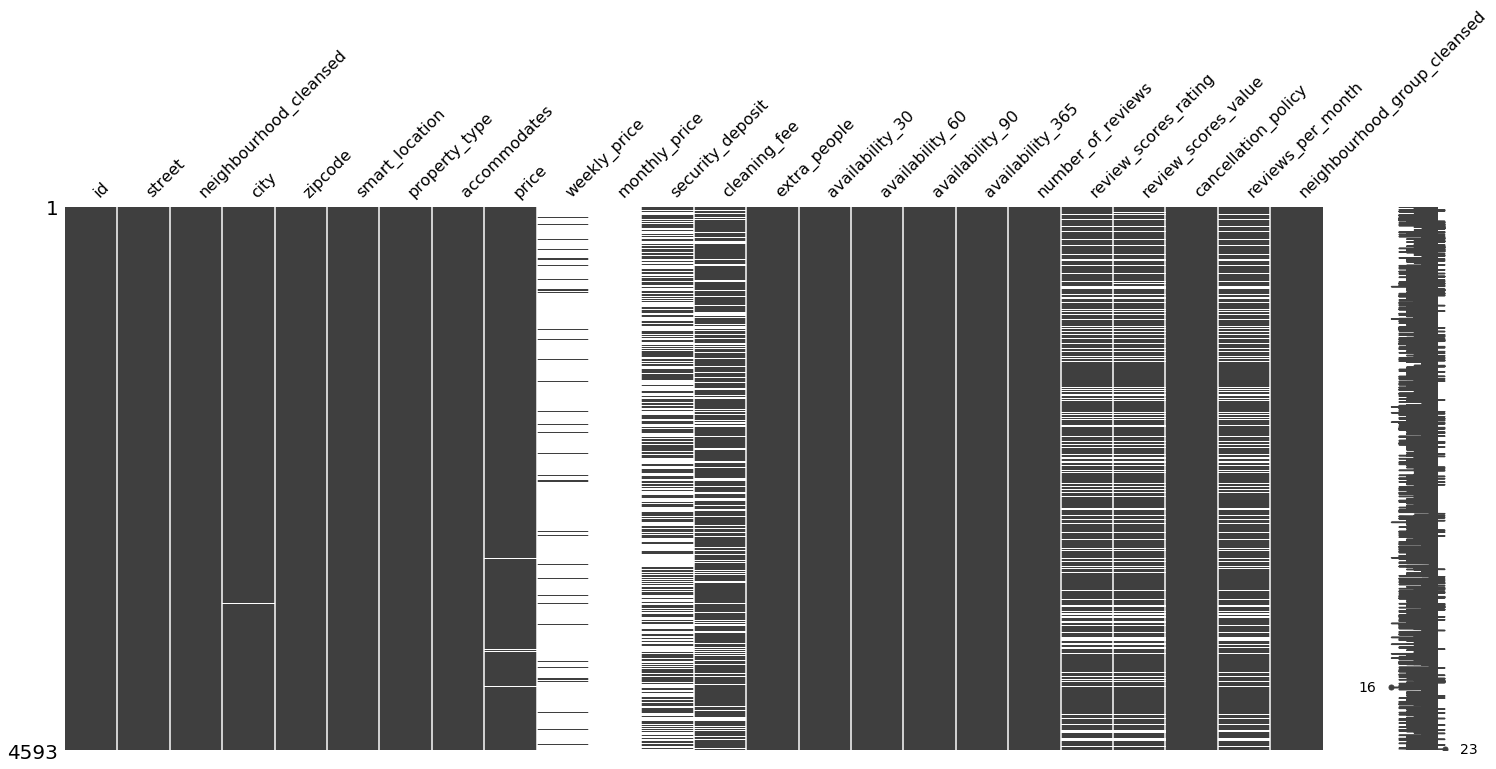

In [26]:
msno.matrix(listings_df)

**Zip code column has no null values (white lines) now. This means the imputation operation has been successfully done**

## Working on Zillow data set (Zip_Zhvi_2bedroom.csv) 
**(contains cost data provided by Zillow)**

In [27]:
zillow_df = pd.read_csv("Zip_Zhvi_2bedroom.csv")

**Displaying the top 5 rows in the new zillow_df dataframe**

In [28]:
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


**Checking for the unique states**

In [29]:
zillow_df['State'].drop_duplicates()

0       NY
1       IL
4       TX
6       CA
8       FL
10      TN
15      NC
17      GA
24      DC
26      MD
27      MO
37      VA
39      NJ
41      OK
47      OH
61      AZ
62      KS
68      NM
71      WA
74      CT
78      NV
82      MA
84      PA
86      MI
94      CO
131     KY
140     OR
141     SC
156     IN
201     ND
218     AR
244     AL
272     MN
273     DE
369     MS
373     ID
393     MT
405     WI
415     HI
451     UT
504     LA
817     RI
868     IA
1027    NE
1338    WY
1436    AK
1695    NH
3022    WV
Name: State, dtype: object

**We need to keep just the New York state data, so we filter the rest out**

In [30]:
zillow_df = zillow_df.loc[zillow_df['State'] == 'NY']

**Checking for the unique cities in NY state**

In [31]:
zillow_df['City'].drop_duplicates()

0                   New York
91                    Ithaca
211                  Yonkers
307          Town of Webster
380         Town of Lockport
437               Huntington
607         Town of Newburgh
642               Middletown
644          North Tonawanda
669             Clifton Park
743                    Union
783            Town of Islip
827         Saratoga Springs
861                Rochester
930                 Perinton
1012       Town of Watertown
1041                  Auburn
1078               Patchogue
1179              Long Beach
1228    Town of Poughkeepsie
1322                  Ramapo
1417                   Chili
1478                Kingston
1518          Town of Greece
1708     Town of Plattsburgh
1769               Scarsdale
1796          Town of Monroe
1804               Wappinger
1818          Town of Oswego
1821                Lysander
                ...         
8504                  Bolton
8507                  Varick
8518                  Otisco
8540          

**We find that there are very many different cities listed in the dataset. However, we need just the NY City data. We'll drop the region, state, city, and metro fields as we won't need them to combine cost and revenue data. We will merge the 2 CSVs on zipcode column. In the Zillow dataset, zipcode has been named RegionName, so renaming it to zipcode for consistency**

In [32]:
zillow_df.rename(columns={'RegionName': 'zipcode'}, inplace=True) #renaming RegionName to zipcode
zillow_df = zillow_df.drop(columns=['RegionID', 'State', 'City', 'Metro']) #dropping columns

In [33]:
zillow_df.head()

,zipcode,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,10128,New York,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,10011,New York,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,10003,New York,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


**Instead of taking into account each month for the last 2 decades, we'll only consider the median value of the median cost values for each year in the last 10 years. Median helps us to guard against large outlier values, and is a better choice compared to calculating the mean**

In [34]:
relevant_years = list(zillow_df.columns[3:])
mapping_dict = {}
for val in relevant_years:
    mapping_dict[val] = val[:4]

new_df = zillow_df.set_index(['zipcode','CountyName','SizeRank']).groupby(mapping_dict, axis=1).median()
new_df.reset_index(inplace=True)
new_df.drop(['1996','1997','1998','1999','2000','2001', '2002', '2003', '2004', '2005', '2006'],inplace=True,axis=1)
zillow_df = copy.deepcopy(new_df)

In [35]:
zillow_df.head()

,zipcode,CountyName,SizeRank,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,1141150.0,1224700.0,1361250.0,1342900.0
1,10023,New York,3,1447850.0,1635850.0,1374950.0,1344550.0,1379700.0,1380450.0,1496400.0,1729600.0,1724050.0,1913000.0,1988700.0
2,10128,New York,14,1055250.0,1200500.0,987550.0,1009050.0,982150.0,1056000.0,1168400.0,1225850.0,1362000.0,1525650.0,1622500.0
3,10011,New York,15,1528250.0,1676250.0,1508800.0,1446300.0,1435900.0,1542250.0,1798350.0,2029500.0,2066800.0,2268000.0,2354000.0
4,10003,New York,21,1414900.0,1532950.0,1396050.0,1278700.0,1363050.0,1370400.0,1533100.0,1735500.0,1809000.0,1935350.0,2005500.0


In [36]:
zillow_df.shape #this has helped to drastically reduce the number of columns and make the data more manageable

(475, 14)

**Now that we have cleaned both the datasets, we'll merge and visualize for comparing cost and revenue. The new dataframe called 'merged_df' contains rows of both the cleaned data frames - 'listings_df' and 'zillow_df'**

In [37]:
common_zip = set(zillow_df['zipcode'])&set(listings_df['zipcode']) #logical AND operation to check for common zipcodes

In [38]:
print("Common zipcodes between the 2 datasets: ",common_zip)

Common zipcodes between the 2 datasets:  {10128, 10003, 10011, 10013, 10014, 10021, 10022, 10023, 10025, 11434, 10028, 10036, 10304, 10305, 10306, 11201, 10308, 10312, 11215, 11217, 11231, 11234}


**Creating merged_df by combining both the dataframes** 

In [39]:
merged_df = pd.merge(zillow_df,listings_df,on='zipcode')
merged_df['zipcode'] = merged_df.zipcode.apply(lambda x: str(x)) #converting zipcodes back to string datatype for plotting purposes

**Performing analysis on 'merged_df' dataframe**

In [40]:
merged_df.head()

,zipcode,CountyName,SizeRank,2007,2008,2009,2010,2011,2012,2013,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value,cancellation_policy,reviews_per_month,neighbourhood_group_cleansed
0,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,0,0,0,0,NaN,NaN,strict,NaN,Manhattan
1,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,0,0,0,1,80.0,10.0,flexible,0.11,Manhattan
2,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,30,60,90,365,0,NaN,NaN,flexible,NaN,Manhattan
3,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,0,0,32,0,NaN,NaN,strict,NaN,Manhattan
4,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,0,0,0,0,NaN,NaN,strict,NaN,Manhattan


In [41]:
merged_df.shape #displays dimension of the dataframe

(1192, 37)

**Using python library 'pandas_profiler' for a quick analysis on the merged data**

In [42]:
pp.ProfileReport(merged_df)

Number of variables,37
Number of observations,1192
Total Missing (%),8.9%
Total size in memory,353.9 KiB
Average record size in memory,304.0 B
Numeric,15
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,13


**From the standard summary, it can be seen that the columns 2007-2017 are highly correlated and have been removed by the profiler. However, we'll keep these columns to perform further analysis. The high correlation helps us safely assume that the cost for 2017 can be projected forward. So, we have taken the cost for 2017 as the cost framework to work on while analyzing the investment plans**

**Checking to see if the merged dataset contains any duplicate values**

In [43]:
merged_df.shape == merged_df.drop_duplicates().shape

True

**There are no duplicate values, which is good**

**We'll now plot the number of properties for each of the zipcodes. We have also shown the neighbourhood groups for better visualization and understanding**

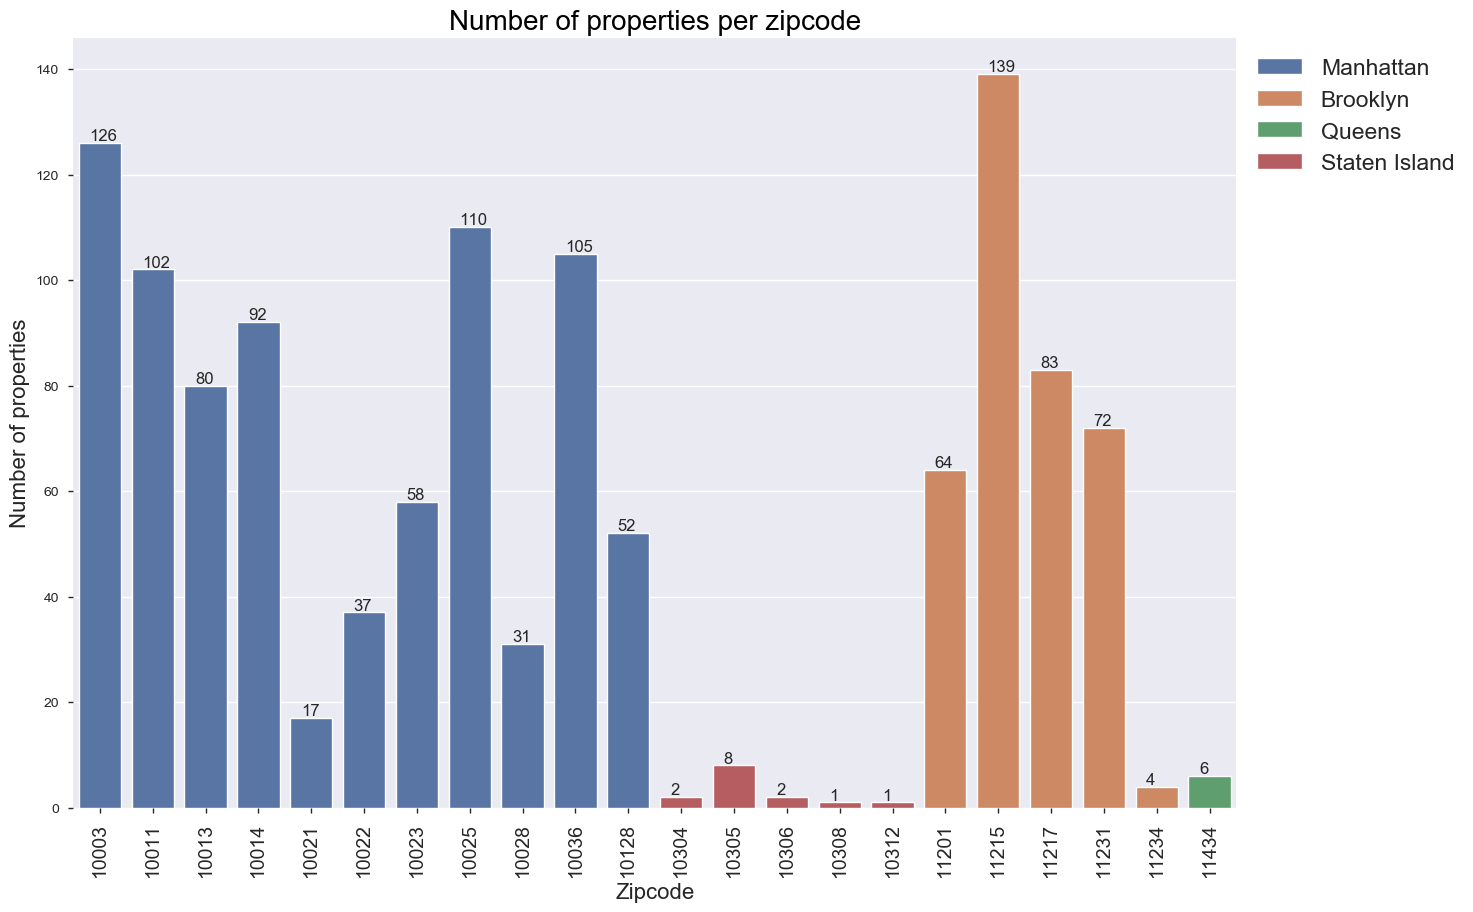

In [44]:
new_df = copy.deepcopy(merged_df)
new_df = new_df.assign(COUNT = new_df.groupby(['zipcode'])['id'].transform('count')) 
clean_df = new_df[['zipcode','COUNT','neighbourhood_group_cleansed']].drop_duplicates()
fig, ax3 = plt.subplots(1,1, figsize=(15,10))
sns.set(font_scale=1.5)
sns.barplot(ax=ax3,data=clean_df, x="zipcode", y="COUNT", hue="neighbourhood_group_cleansed",ci=None,dodge=False)
plt.xticks(rotation='vertical',fontsize=14)
ax3.set_xlabel('Zipcode', fontsize=16)
ax3.set_ylabel('Number of properties',fontsize=16)
ax3.legend(bbox_to_anchor=(1.0, 1.0))
ax3.set_title("Number of properties per zipcode", loc='center', fontsize=20, fontweight=3, color='black')
for i in ax3.patches:
    if(not np.isnan(i.get_height())): 
        ax3.text(i.get_x()+.2, i.get_height()+0.5,int(i.get_height()),fontsize=12)

**The number of properties across zipcodes vary widely. It ranges from 1 to 139. This is an interesting observation to be kept in mind while making recommendations. Manhattan and Brooklyn have very large number of properties that are listed on AirBnB. It is worth noting that whatever recommendations we make would be a little biased toward Manhattan and Brooklyn because we have more data points for these 2 boroughs**

**Displaying number of properties for each neighbourhood. Manhattan has the highest number of properties, followed by Brooklyn. Queens and Staten Island have much less numbers**

Text(0, 0.5, 'Number of properties')

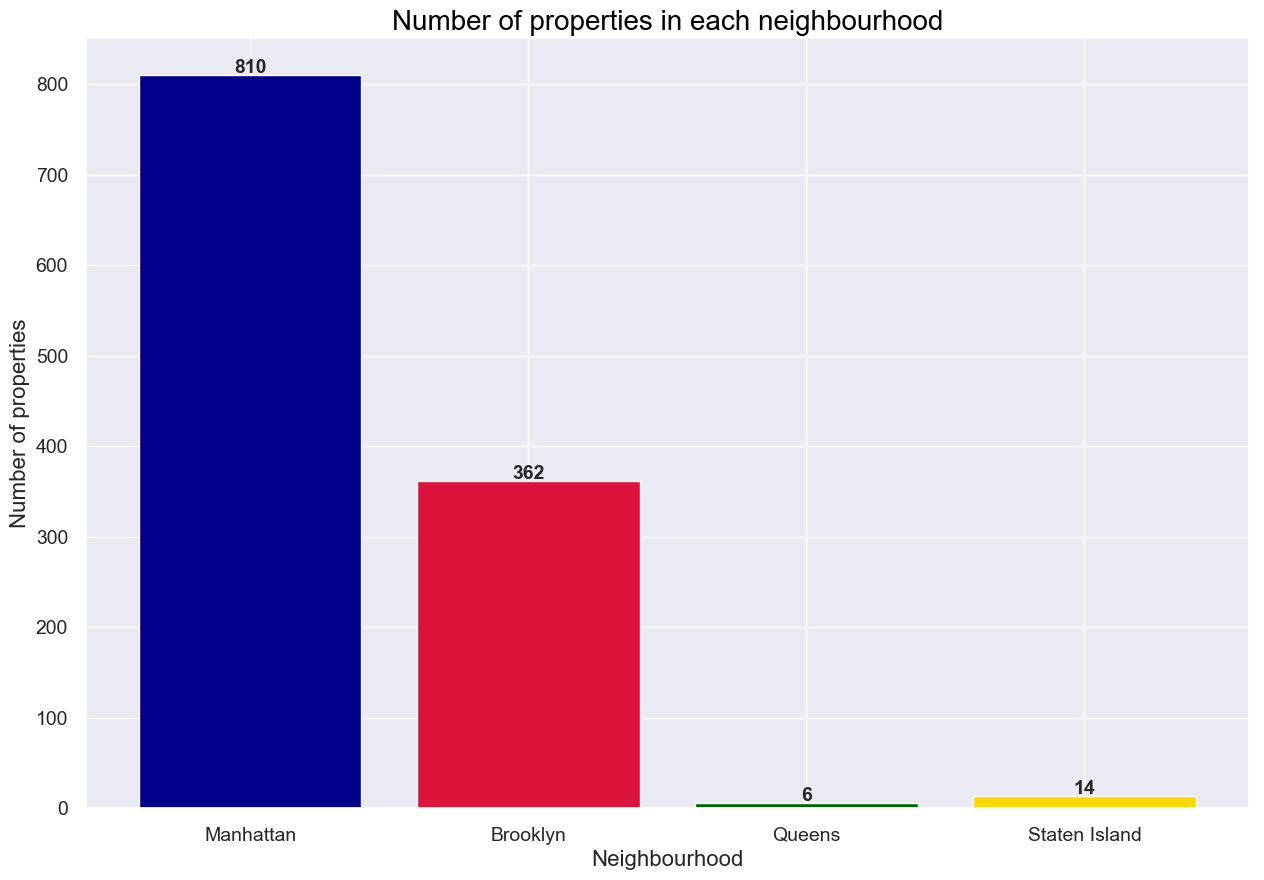

In [45]:
new_df = copy.deepcopy(merged_df)
new_df = new_df.assign(COUNT = new_df.groupby(['neighbourhood_group_cleansed'])['id'].transform('count')) 
clean_df = new_df[['neighbourhood_group_cleansed','COUNT']].drop_duplicates()
plt.figure(5, figsize=(15, 10))
x = list(clean_df['neighbourhood_group_cleansed'])
y = list(clean_df['COUNT'])
plt.bar(x,y,color=['darkblue', 'crimson', 'darkgreen', 'gold', 'cyan'])
for a,b in zip(x, y):
    plt.text(a, b+2, str(b), fontsize=14, horizontalalignment='center',verticalalignment='baseline',fontweight='bold')
plt.title("Number of properties in each neighbourhood", loc='center', fontsize=20, fontweight=3, color='black')
plt.yticks(fontsize=14) 
plt.xticks(fontsize=14)
plt.xlabel("Neighbourhood",fontsize=16)
plt.ylabel("Number of properties",fontsize=16)

**Plotting the prices of the properties listed on AirBnB across the zipcodes. There are a few outliers which are priced very high or very low. To prevent them from skewing our analysis, we'll remove records where price per night is less than 50 dollars and ones that are more than 850 dollars**

Text(90.33765509259264, 0.5, 'Price (in USD)')

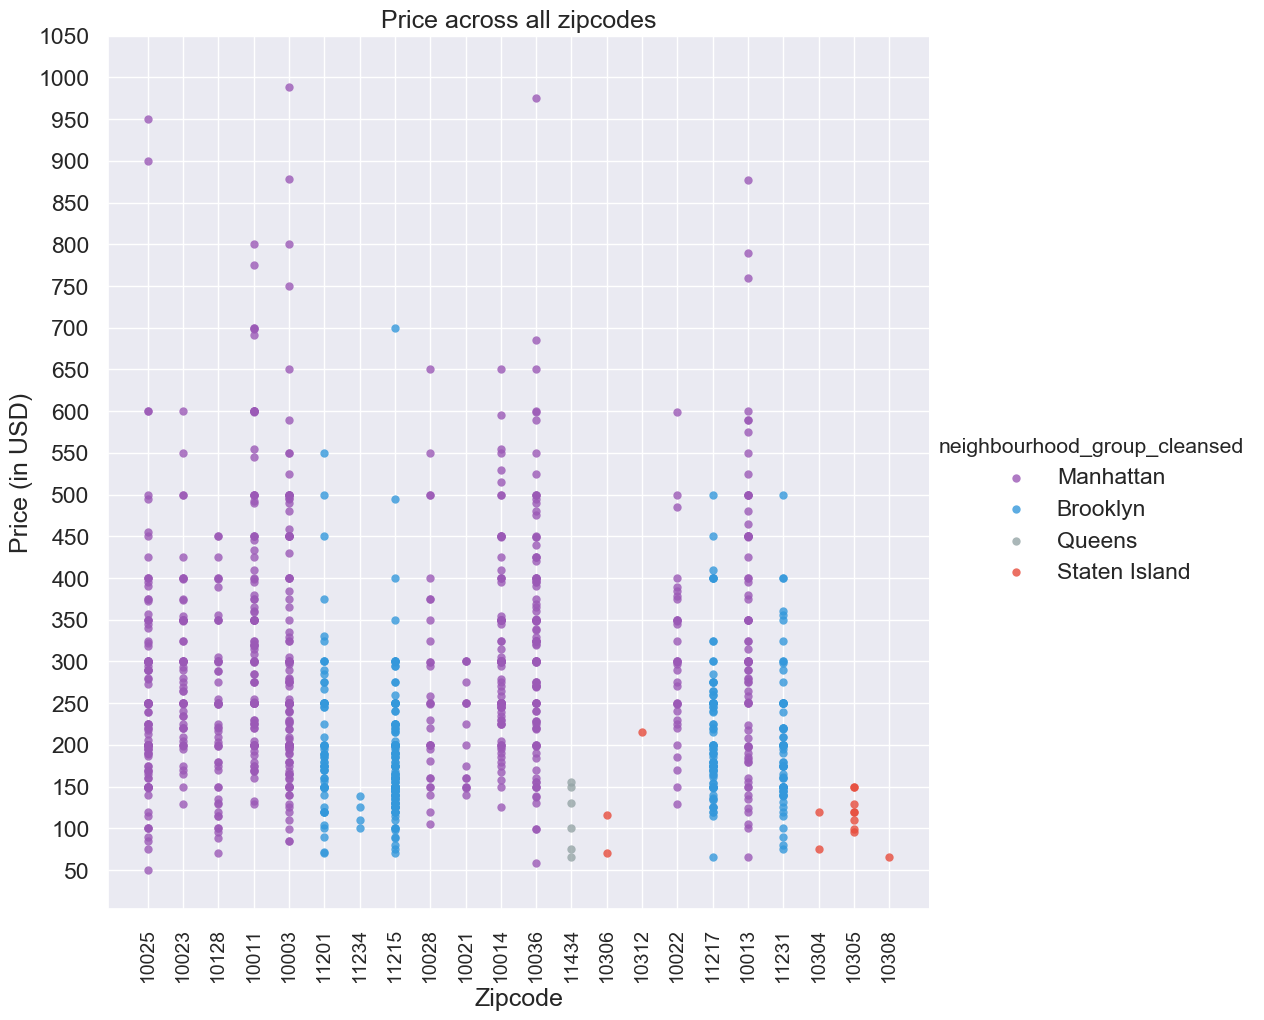

In [46]:
sns.set(font_scale=1.5)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] #choosing color_palette() from seaborn library
sns.lmplot(x="zipcode", y="price", data=merged_df, fit_reg=False, hue='neighbourhood_group_cleansed', legend=True, palette=flatui, height=10)
plt.xticks(rotation='vertical',fontsize=14)
plt.yticks(np.arange(50,1100,50))
plt.title("Price across all zipcodes")
plt.xlabel('Zipcode')
plt.ylabel('Price (in USD)')


**Keeping just the listings with price per night ranging between 50 to 850 dollars** 

In [47]:
merged_df = merged_df[merged_df.price < 850]
merged_df = merged_df[merged_df.price > 50]

**We have already consolidated the cost data for Zillow by calculating the median cost for zipcodes from 2007 to 2017 earlier. Now let's display the median price of properies within the zipcodes for the last 10 years**

Text(0, 0.5, 'Average Median price (in USD)')

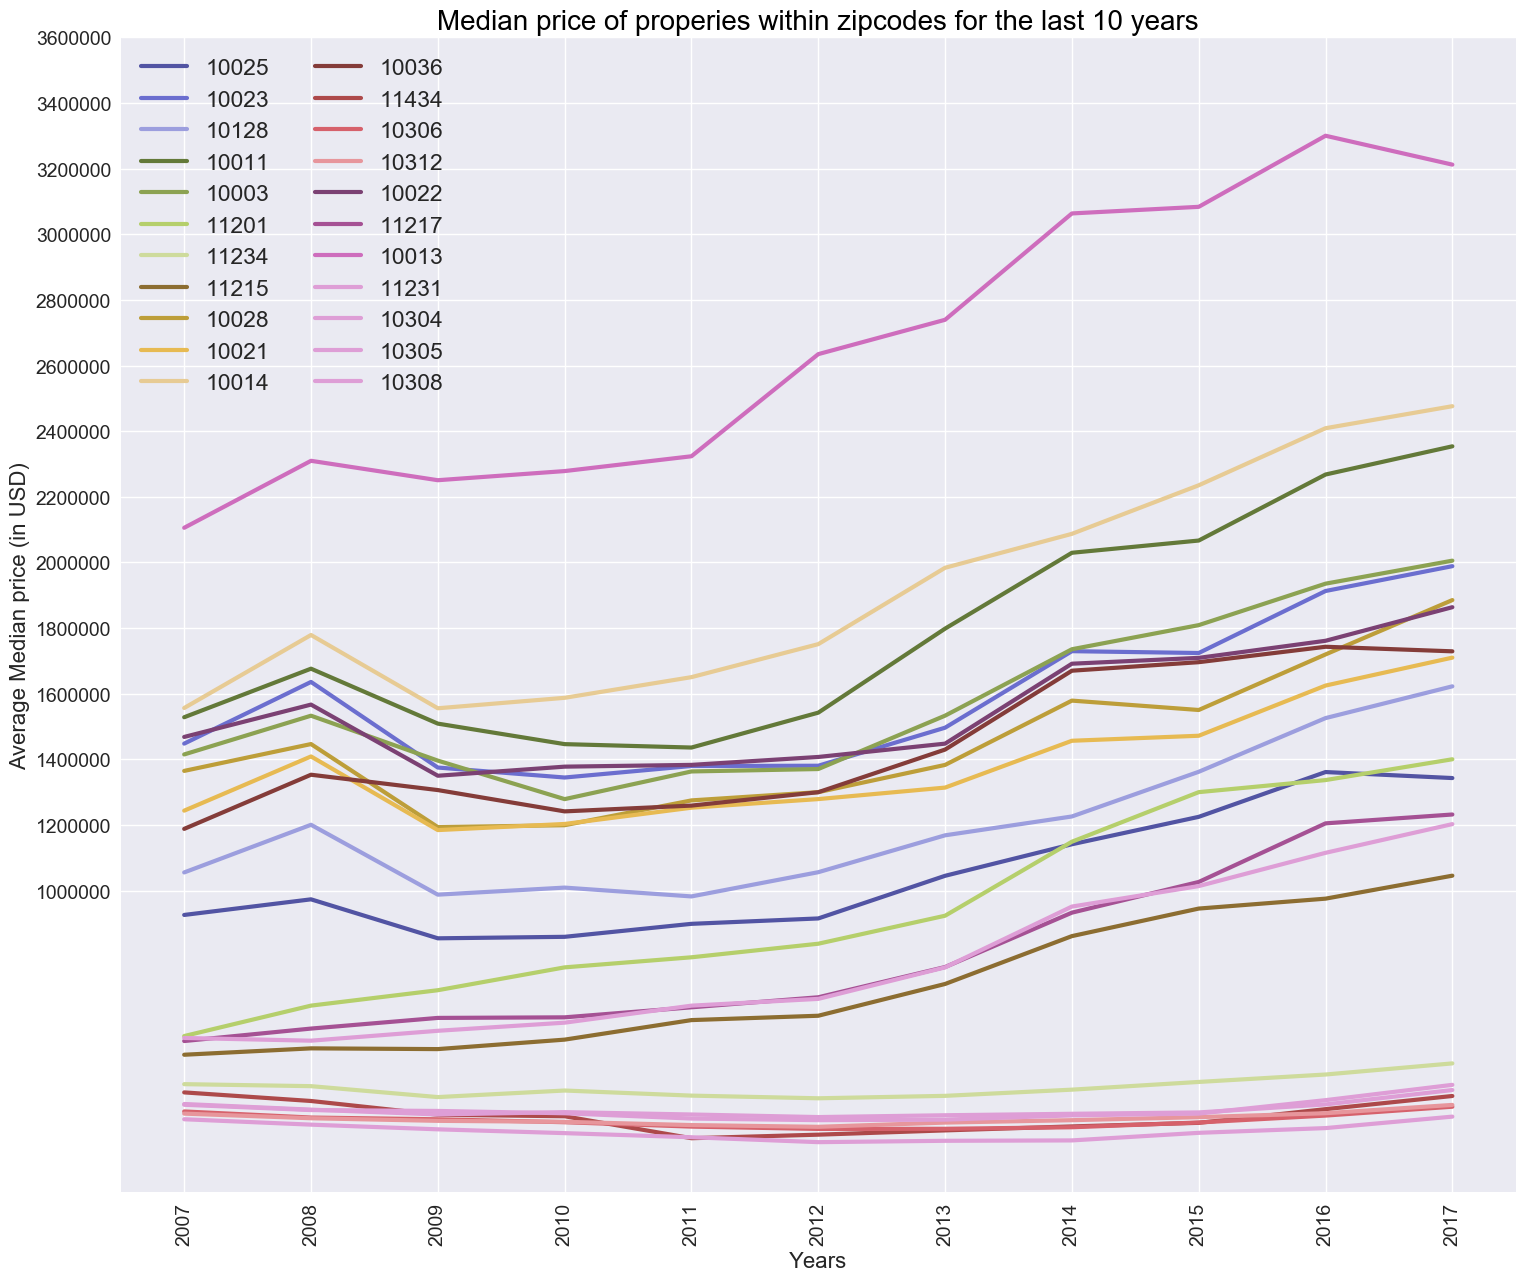

In [48]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20b')
num=0
df = copy.deepcopy(zillow_df)
df = df.drop(['CountyName','SizeRank'],axis=1)
df = df.set_index('zipcode')
plt.figure(1, figsize=(18, 15))

for zipcode in df.index.tolist():
    if zipcode in common_zip:
        num+=1
        new_df = df.loc[zipcode]
        x = df.columns.values
        y = list(new_df)
        plt.plot(x, y, marker='', color=palette(num), linewidth=3, label=zipcode)

plt.legend(loc=2, ncol=2)
plt.yticks(list(np.arange(1000000,3800000,200000)),fontsize=14) 
plt.xticks(rotation='vertical',fontsize=14)
plt.title("Median price of properies within zipcodes for the last 10 years", loc='center', fontsize=20, fontweight=3, color='black')
plt.xlabel("Years",fontsize=16)
plt.ylabel("Average Median price (in USD)",fontsize=16)

**As can be expected, there is a dip in the costs of properties around 2008/2009 because of the 2008 financial crisis when housing prices took a hit. After that, there has been a steady increasing trend. To keep our analysis simple, we assume that the market conditions are stable, and we'll project the cost values for 2017 to be the cost value now when Zillow goes out to that market to invest**

**Assuming that Zillow plans to invest in the beginning of 2019, we take the median cost of properties in 2017 to be the same in 2019**

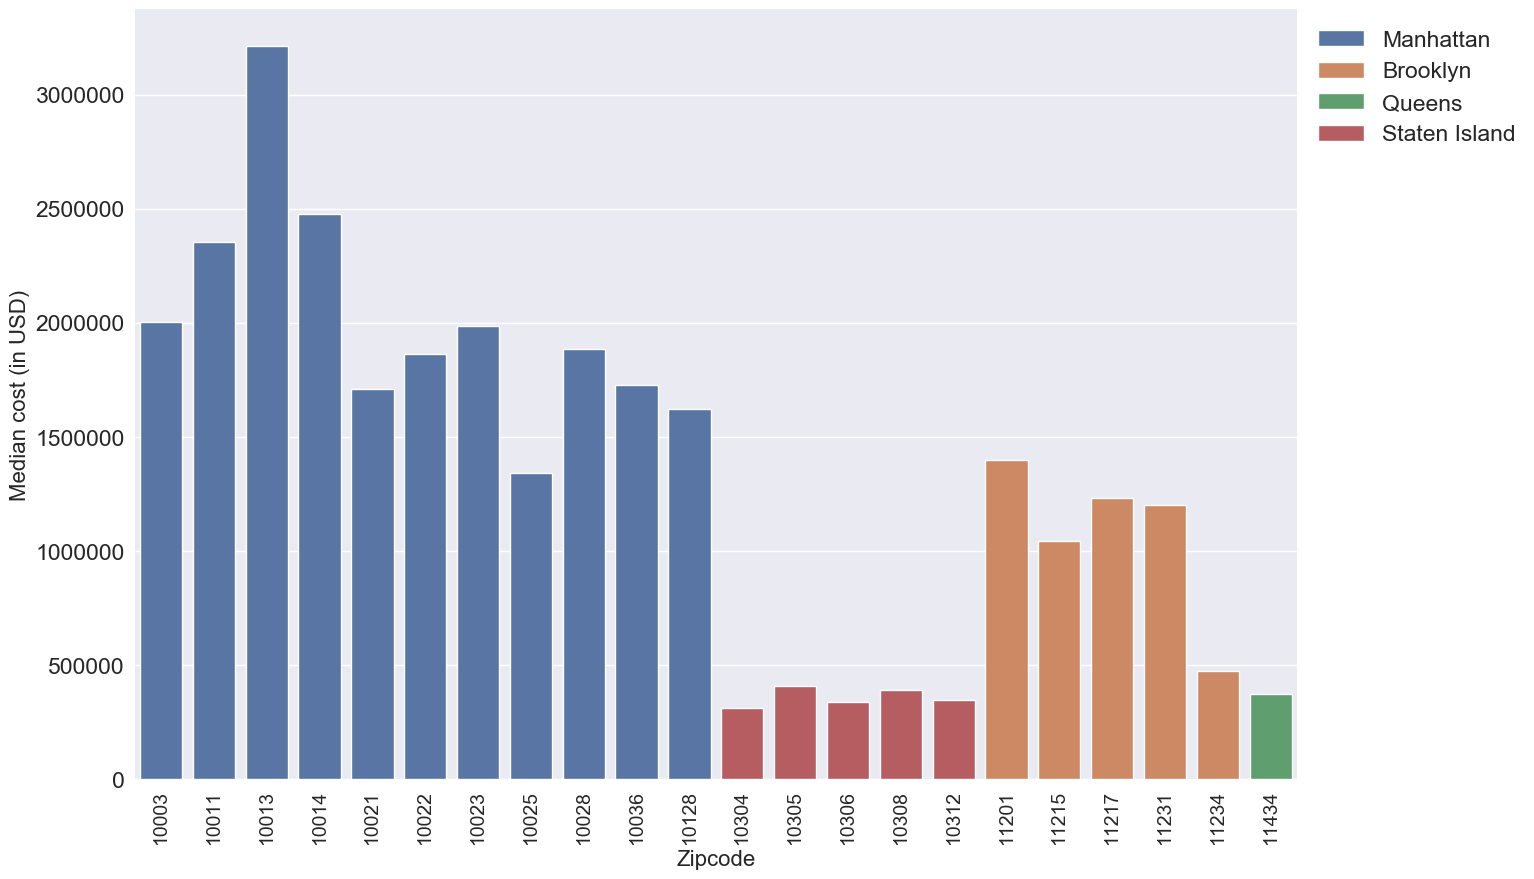

In [49]:
fig, ax3 = plt.subplots(1,1, figsize=(15,10))
sns.set(font_scale=1.5)
sns.barplot(ax=ax3,data=merged_df, x="zipcode", y="2017", hue="neighbourhood_group_cleansed",ci=None,dodge=False)
plt.xticks(rotation='vertical',fontsize=14)
ax3.set_xlabel('Zipcode', fontsize=16)
ax3.set_ylabel('Median cost (in USD)',fontsize=16)
ax3.legend(bbox_to_anchor=(1.0, 1.0))

**Zipcodes in Manhattan are very expensive, followed by Brooklyn. Queens and Staten Island are much less expensive. It might seem that Zillow will make good returns on their investments if they invest in the less expensive properties, however, we must drill down deeper before making any inferences**

**To decide which availabilty feature to pick for analysis, with the help of a heatmap, and through visualization, we check how much variation is present between all the columns - availability_30, availability_60, availability_90, and availability_365**

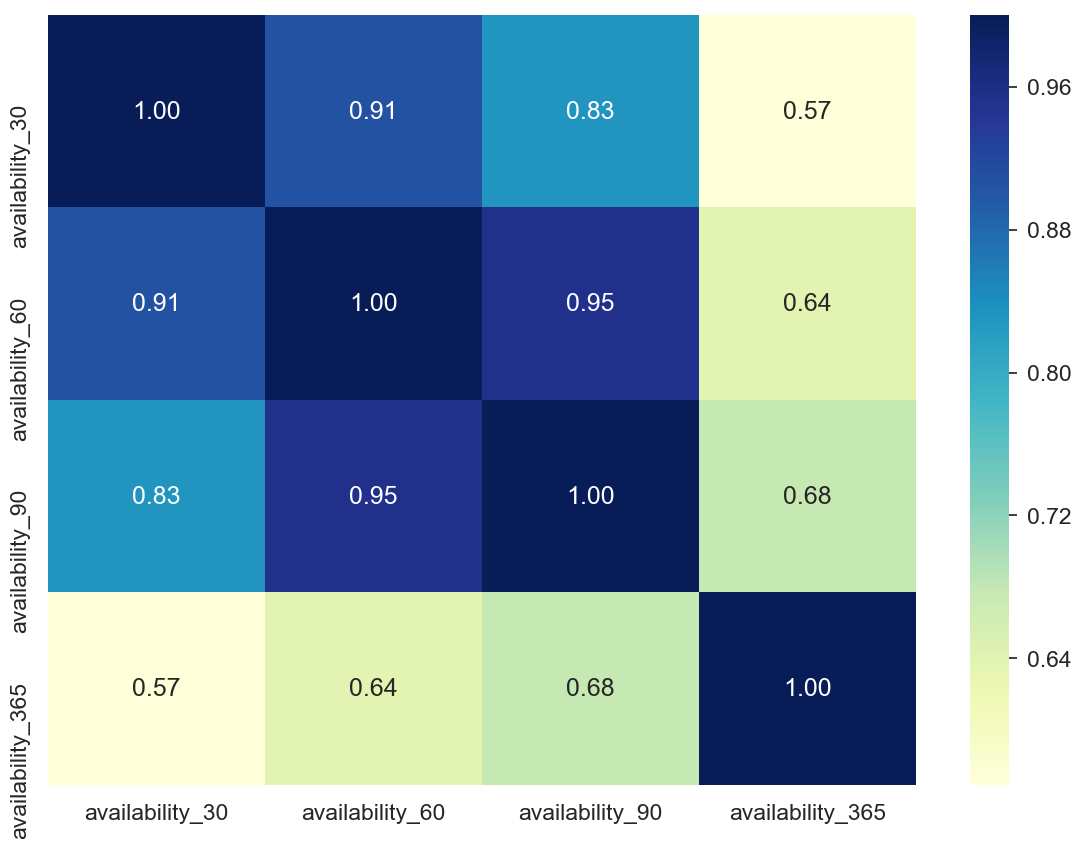

In [50]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
sub_df = merged_df[['availability_30','availability_60','availability_90','availability_365']]
ax = sns.heatmap(sub_df.corr(), annot=True, fmt=".2f",cmap="YlGnBu")

**It can be observed that availability_60 and availability_90 are highly corelated to availability_30 and can be removed (This aligns with the profiler suggestion of removing these features from analysis). we'll only consider availability_365 for further analysis**

**Before we start to calculate the revenue, we'll check the occupancies accross different properties per zipcode. We'll consider the listings available in the next 365 days to deduce the occupancy rates. If the apartment has 100% occupancy, the value in the column 'availability_365' will be 0, if 50% occupancy is available, then the value would be around 180, and for 0% occupancy, the value would be 365, and so on. The higher the occupancy, the greater it is expected to generate more revenues for Zillow**

In [51]:
merged_df[['zipcode','id','availability_365']][:20] #the first 20 records displayed

,zipcode,id,availability_365
0,10025,276994,0
1,10025,13911206,0
2,10025,4000561,365
3,10025,1300191,32
4,10025,9530079,0
5,10025,17255171,0
6,10025,1399187,340
7,10025,16868323,21
8,10025,18508770,62
9,10025,12430126,0


In [52]:
merged_df['occupancy'] = (1 - merged_df['availability_365']/365) * 100 #occupancy percentage calculated

In [53]:
merged_df[['zipcode','id','availability_365','occupancy']][:20]

,zipcode,id,availability_365,occupancy
0,10025,276994,0,100.000000
1,10025,13911206,0,100.000000
2,10025,4000561,365,0.000000
3,10025,1300191,32,91.232877
4,10025,9530079,0,100.000000
5,10025,17255171,0,100.000000
6,10025,1399187,340,6.849315
7,10025,16868323,21,94.246575
8,10025,18508770,62,83.013699
9,10025,12430126,0,100.000000


**we'll take the mean of the percentage values for each zipcode to be representative occupancy percentage for that area, which would be taken into consideration for estimated revenue calculation**

In [54]:
merged_df = merged_df.assign(avg_occupancy = merged_df.groupby(['zipcode'])['occupancy'].transform('mean'))

In [55]:
merged_df[['zipcode','avg_occupancy']].drop_duplicates()

,zipcode,avg_occupancy
0,10025,71.662276
110,10023,72.994804
168,10128,70.284510
220,10011,67.778082
322,10003,62.942421
448,11201,75.680651
512,11234,12.465753
516,11215,72.807726
655,10028,79.637649
686,10021,88.373288


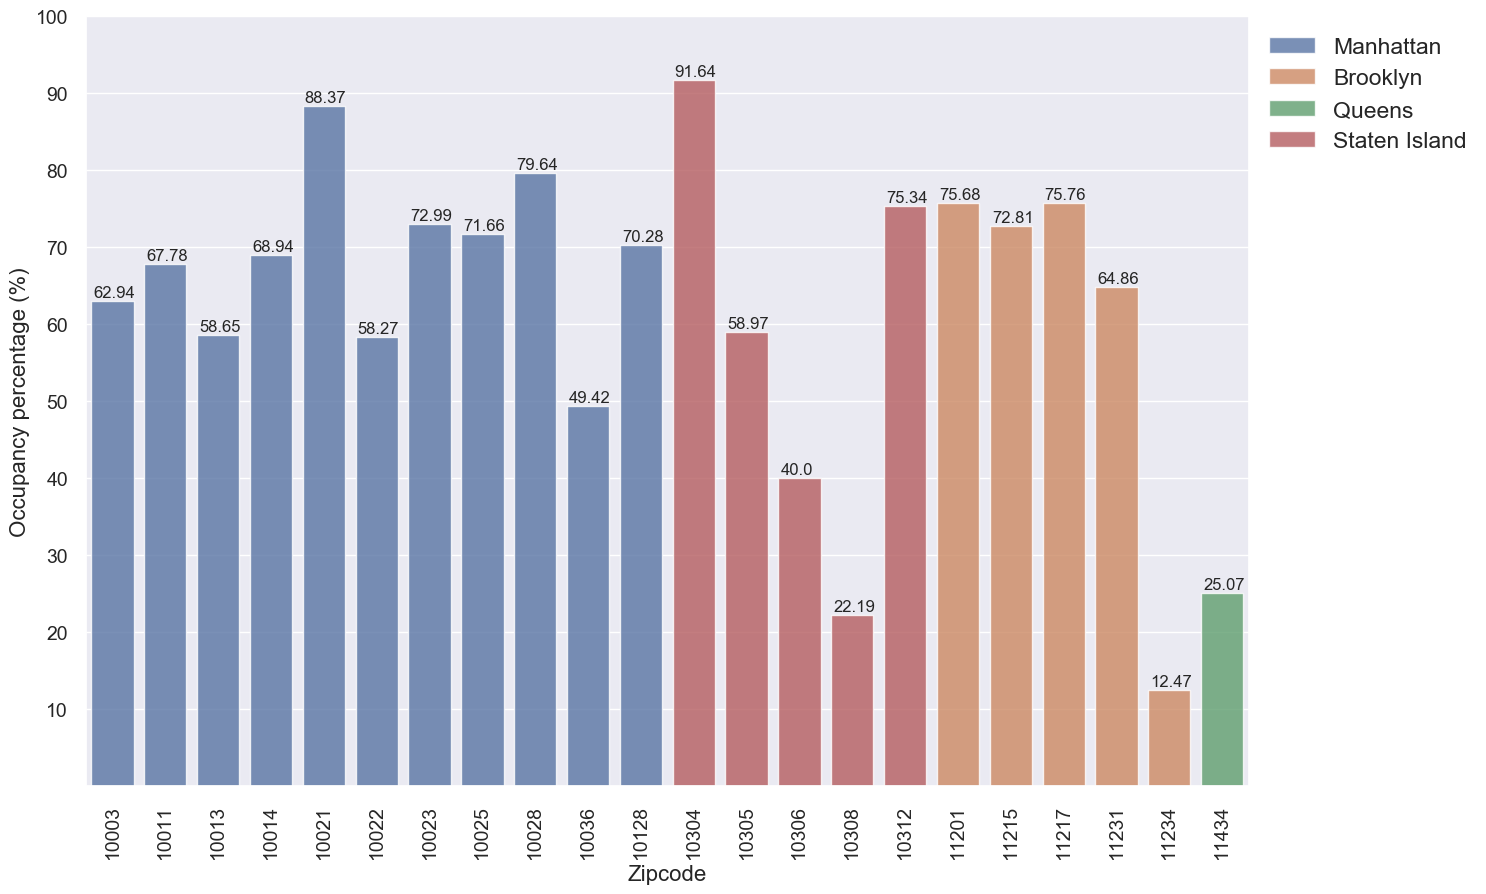

In [56]:
fig, ax4 = plt.subplots(1,1, figsize=(15,10))
sns.set(font_scale=1.5)
g = sns.barplot(ax=ax4,data=merged_df, y="avg_occupancy", x="zipcode", hue="neighbourhood_group_cleansed",ci=None,dodge=False,alpha=0.8)
plt.yticks(np.arange(10,110,10),fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
ax4.set_xlabel('Zipcode', fontsize=16)
ax4.set_ylabel('Occupancy percentage (%)',fontsize=16)
ax4.legend(bbox_to_anchor=(1.0, 1.0))
for i in ax4.patches:
    if(not np.isnan(i.get_height())): 
        ax4.text(i.get_x()+.04, i.get_height()+0.5,round(i.get_height(),2),fontsize=12)


**Point to note: The zip code 10304 in Staten Island has a very high occupancy of 91.64%. From the median cost versus zipcode plot it is observed that its cost is less than 500,000 dollars which lies in the low expense bracket. This zip code should be definitely kept into consideration while making further analysis**

In [57]:
 merged_df['avg_occupancy'].mean()

67.100788637989

**So, the average occupancy across all zipcodes comes out to be 67%**

**Now, we'll calculate revenue for each property based on 100%, 67% occupancies to visualize the best case scenario against the normal expected scenario. We have added cleaning fee to calculate total price charged per night**

In [58]:
merged_df['cleaning_fee'].fillna(0,inplace=True) 
merged_df['revenue100'] = (merged_df['price'] * 365) + merged_df['cleaning_fee']        
merged_df['revenueAvgOcc'] = ((merged_df['price'] * 365) + merged_df['cleaning_fee']) * 0.671

In [59]:
merged_df.head()

,zipcode,CountyName,SizeRank,2007,2008,2009,2010,2011,2012,2013,...,number_of_reviews,review_scores_rating,review_scores_value,cancellation_policy,reviews_per_month,neighbourhood_group_cleansed,occupancy,avg_occupancy,revenue100,revenueAvgOcc
0,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,NaN,NaN,strict,NaN,Manhattan,100.000000,71.662276,69185.0,46423.135
1,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,1,80.0,10.0,flexible,0.11,Manhattan,100.000000,71.662276,91400.0,61329.400
2,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,NaN,NaN,flexible,NaN,Manhattan,0.000000,71.662276,219200.0,147083.200
3,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,NaN,NaN,strict,NaN,Manhattan,91.232877,71.662276,73100.0,49050.100
4,10025,New York,1,925700.0,973300.0,854500.0,859050.0,898600.0,915050.0,1045000.0,...,0,NaN,NaN,strict,NaN,Manhattan,100.000000,71.662276,105850.0,71025.350


**Since we are given the median cost for zipcodes, to calculate the estimated total purchase cost per zipcode, we'll multiply the median cost by number of properties for each zipcode. This would generate the cumulative sum of property cost within each zipcode. we'll use this total cost value against the estimated revenue for the analysis**   

In [60]:
new_df1 = copy.deepcopy(merged_df)
new_df1['zipcode'] = new_df1.zipcode.apply(lambda x: str(x))
new_df1 = new_df1[['id','zipcode','revenueAvgOcc','2017']]
new_df1 = new_df1.assign(tot_rev = new_df1.groupby(['zipcode'])['revenueAvgOcc'].transform('sum'))
new_df1 = new_df1.assign(annual_cost = new_df1.groupby(['zipcode'])['2017'].transform('sum'))
new_df1 = new_df1[['zipcode','annual_cost','tot_rev']]
new_df1 = new_df1.drop_duplicates()

In [61]:
new_df1.head()

,zipcode,annual_cost,tot_rev
0,10025,139661600.0,6454124.215
110,10023,115344600.0,4216920.301
168,10128,84370000.0,3069746.493
220,10011,235400000.0,8501981.994
322,10003,246676500.0,8652835.543


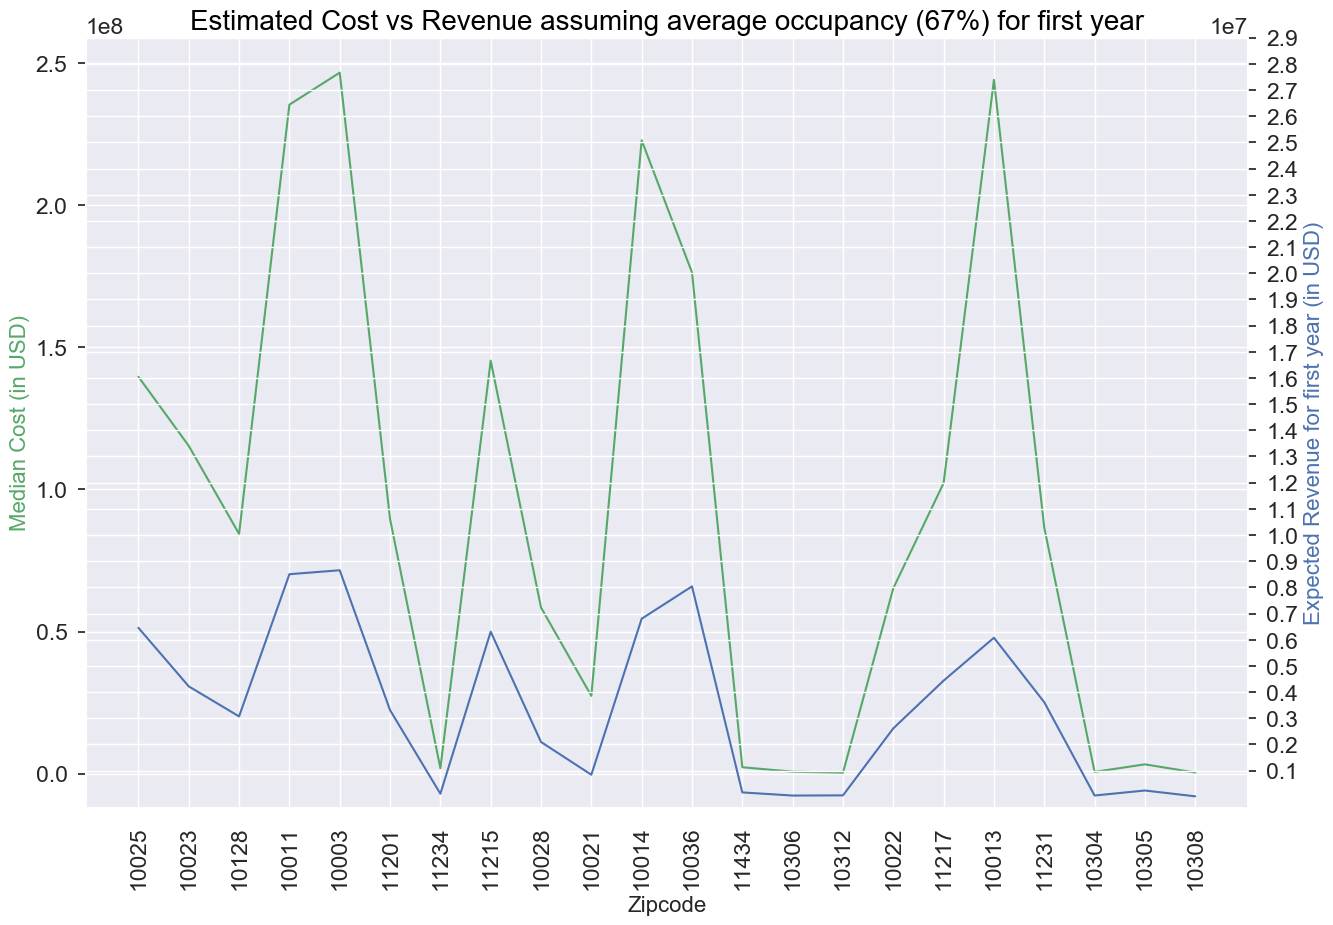

In [76]:
x = list(new_df1['zipcode'])
y1 = list(new_df1['annual_cost'])
y2 = list(new_df1['tot_rev'])
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_title('Estimated Cost vs Revenue assuming average occupancy (67%) for first year', loc='center', fontsize=20, fontweight=3, color='black')
ax1.set_xlabel('Zipcode', fontsize=16)
ax1.set_ylabel('Median Cost (in USD)', color='g',fontsize=16)
ax2.set_ylabel('Expected Revenue for first year (in USD)', color='b',fontsize=16)
ax1.set_xticklabels(labels=x,rotation=90)
ax2.set_yticks(np.arange(1000000,30000000,1000000))
plt.show()

In [63]:
new_df2 = copy.deepcopy(merged_df)
new_df2['zipcode'] = new_df2.zipcode.apply(lambda x: str(x))
new_df2 = new_df2[['id','zipcode','revenue100','2017']]
new_df2 = new_df2.assign(tot_rev = new_df2.groupby(['zipcode'])['revenue100'].transform('sum'))
new_df2 = new_df2.assign(annual_cost = new_df2.groupby(['zipcode'])['2017'].transform('sum'))
new_df2 = new_df2[['zipcode','annual_cost','tot_rev']]
new_df2 = new_df2.drop_duplicates()

In [64]:
new_df2.head()

,zipcode,annual_cost,tot_rev
0,10025,139661600.0,9618665.0
110,10023,115344600.0,6284531.0
168,10128,84370000.0,4574883.0
220,10011,235400000.0,12670614.0
322,10003,246676500.0,12895433.0


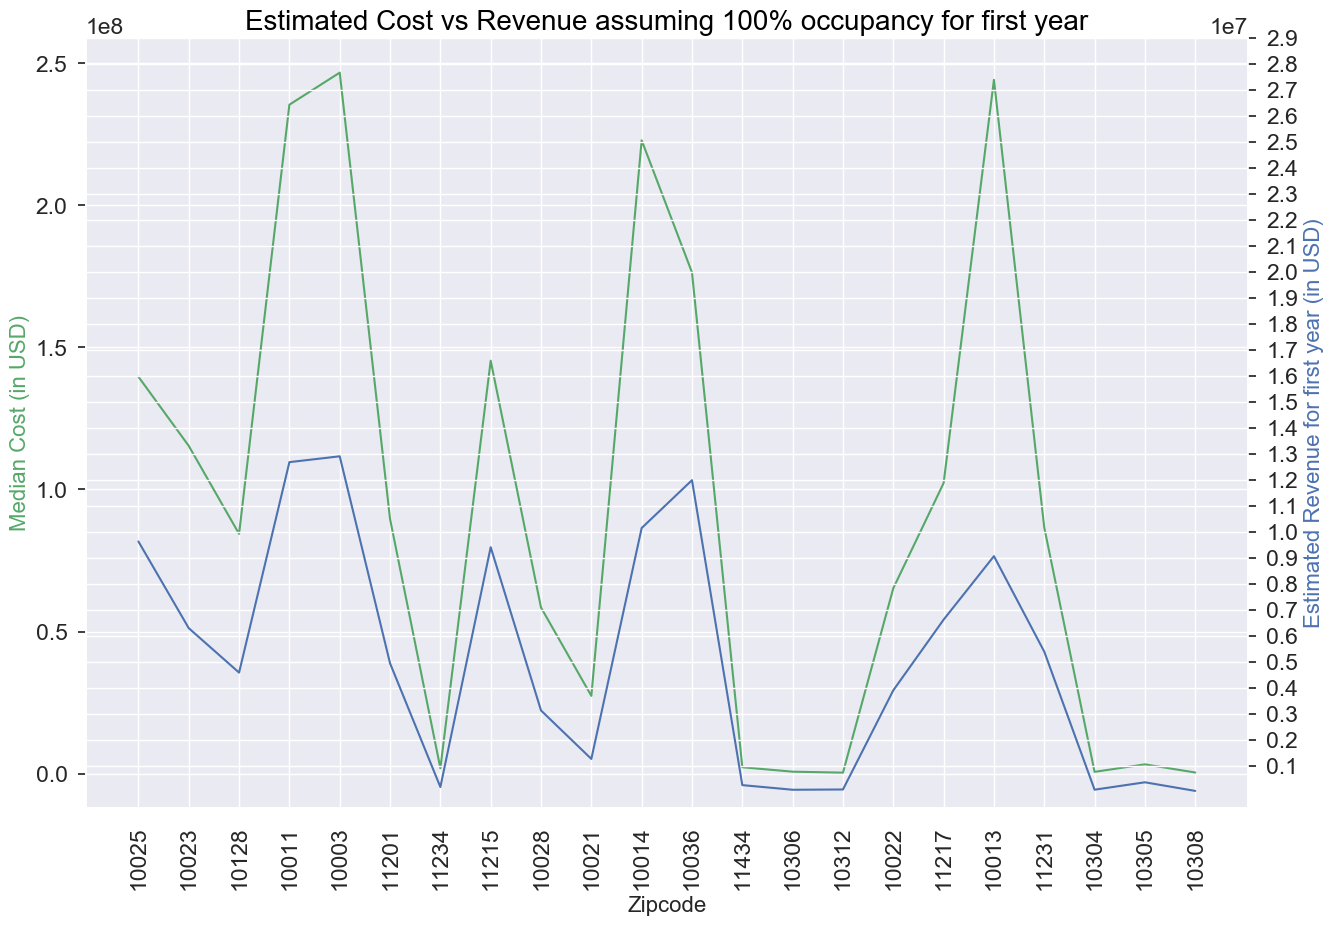

In [77]:
x = list(new_df2['zipcode'])
y1 = list(new_df2['annual_cost'])
y2 = list(new_df2['tot_rev'])
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_title('Estimated Cost vs Revenue assuming 100% occupancy for first year', loc='center', fontsize=20, fontweight=3, color='black')
ax1.set_xlabel('Zipcode', fontsize=16)
ax1.set_ylabel('Median Cost (in USD)', color='g',fontsize=16)
ax2.set_ylabel('Estimated Revenue for first year (in USD)', color='b',fontsize=16)
ax1.set_xticklabels(labels=x,rotation=90)
ax2.set_yticks(np.arange(1000000,30000000,1000000))
plt.show()

**Realistically, the revenue per zip code comes out to be very low compared to the median cost, and would take some years to break even. However, these estimates are for the first year for the company, and we need to check which areas provide maximum revenues, that is, areas having minimum difference would be more beneficial for the company**

In [66]:
new_df4 = copy.deepcopy(merged_df[['id','zipcode','revenueAvgOcc','2017','neighbourhood_group_cleansed']])
new_df4 = new_df4.assign(tot_rev = new_df4.groupby(['zipcode'])['revenueAvgOcc'].transform('sum'))
new_df4 = new_df4.assign(annual_cost = new_df4.groupby(['zipcode'])['2017'].transform('sum'))
new_df4['diff'] = new_df4['annual_cost'] - new_df4['tot_rev'] 
new_df4 = new_df4[['zipcode','diff','neighbourhood_group_cleansed']]
new_df4 = new_df4.drop_duplicates()

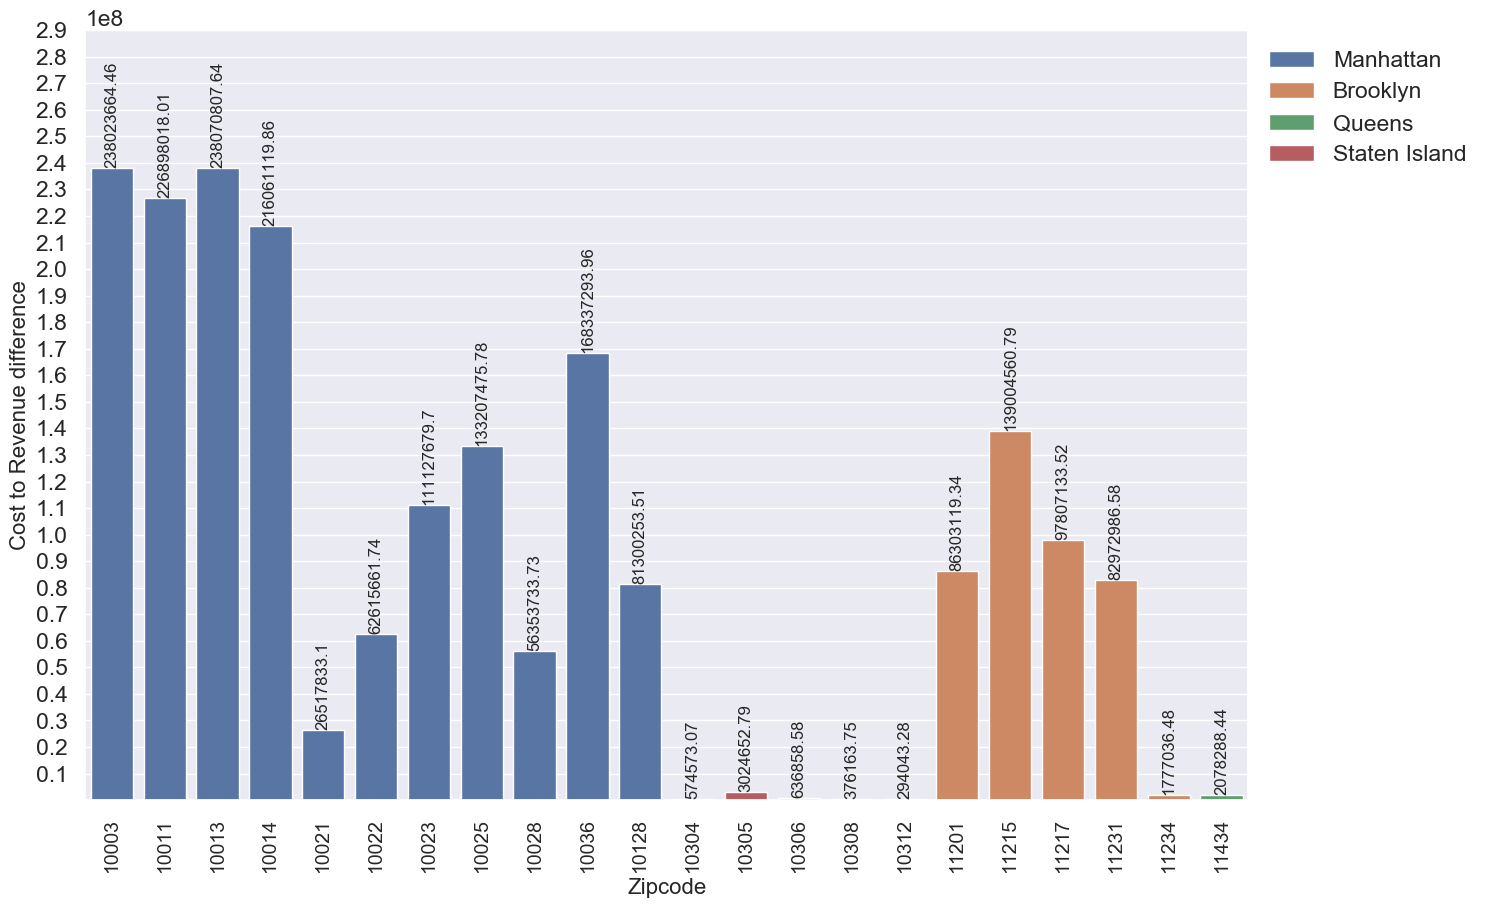

In [67]:
fig, ax4 = plt.subplots(1,1, figsize=(15,10))
sns.set(font_scale=1.5)
sns.barplot(ax=ax4,data=new_df4, x="zipcode", y="diff", hue="neighbourhood_group_cleansed",ci=None, dodge=False)
plt.xticks(rotation='vertical',fontsize=14)
plt.yticks(np.arange(10000000,300000000,10000000))
ax4.set_xlabel('Zipcode', fontsize=16)
ax4.set_ylabel('Cost to Revenue difference',fontsize=16)
ax4.legend(bbox_to_anchor=(1.0, 1.0))
for i in ax4.patches:
    if(not np.isnan(i.get_height())): 
        ax4.text(i.get_x()+0.4, i.get_height(),round(i.get_height(),2),fontsize=12,rotation=90,horizontalalignment='center',verticalalignment='bottom')

**From the last 2 graphs, it can be observed that zipcodes 10304, 10308, 10312, and 10306 have quite low difference, which look like good candidates for investment. However, these are all zipcodes belonging to Staten Island. They have low cost to revenue ratio, but it wouldn't be fair to immediately invest in them, as the number of properties listed is very low to generate any substantial revenue. Also, the dataset has very few data points from Staten Island and Queens to make any calculated investment decisions. So, we will pick only 10304 from Staten Island as we had noted earlier that cost is low and occupancy rate is very high there. We'll later check for the review effect on 10304 to finally conclude on keeping or discarding it. From the remaining zipcodes, it can be observed that properties in Manhattan would generate sufficient revenue, especially in areas belonging to zipcodes 10021, 10022, 10023, 10025, 10028, and 10128 followed by zipcodes 11201, 11217, 11231, and 11234 from Brooklyn**

**Now, let's see the effect of reviews on different listings across zipcodes. We have normalized the number of reviews and the review scores values separately to a scale of 0 to 1. Key performance indicators are often scaled to a range of 0 to 1 to better account for their effects**

In [68]:
merged_df[['zipcode','id','number_of_reviews','review_scores_value']][:20]

,zipcode,id,number_of_reviews,review_scores_value
0,10025,276994,0,NaN
1,10025,13911206,1,10.0
2,10025,4000561,0,NaN
3,10025,1300191,0,NaN
4,10025,9530079,0,NaN
5,10025,17255171,1,NaN
6,10025,1399187,8,10.0
7,10025,16868323,3,9.0
8,10025,18508770,0,NaN
9,10025,12430126,2,8.0


**From the (pandas) profiler ran earlier, we know that 'number_of_reviews' has no missing values, but 'review_scores_value' has 21.5% missing values. We'll replace all the missing values by the minimum review score value available (in that column), assuming that if the review score value is missing, it probably is the minimum value. This way we can keep all the records instead of dropping 21.5% of them**

In [69]:
merged_df['review_scores_value'] = merged_df['review_scores_value'].fillna(merged_df['review_scores_value'].min())

**Normalizing (using min-max normalization calculation) the columns 'number_of_reviews' and 'review_scores_value'**

In [70]:
merged_df['rsv_norm'] = (merged_df['review_scores_value']-merged_df['review_scores_value'].min())/(merged_df['review_scores_value'].max()-merged_df['review_scores_value'].min())
merged_df['nr_norm'] = (merged_df['number_of_reviews']-merged_df['number_of_reviews'].min())/(merged_df['number_of_reviews'].max()-merged_df['number_of_reviews'].min())

In [71]:
merged_df[['zipcode','id','number_of_reviews','nr_norm','review_scores_value','rsv_norm']][:20] #printing first 20 records

,zipcode,id,number_of_reviews,nr_norm,review_scores_value,rsv_norm
0,10025,276994,0,0.000000,2.0,0.000
1,10025,13911206,1,0.003704,10.0,1.000
2,10025,4000561,0,0.000000,2.0,0.000
3,10025,1300191,0,0.000000,2.0,0.000
4,10025,9530079,0,0.000000,2.0,0.000
5,10025,17255171,1,0.003704,2.0,0.000
6,10025,1399187,8,0.029630,10.0,1.000
7,10025,16868323,3,0.011111,9.0,0.875
8,10025,18508770,0,0.000000,2.0,0.000
9,10025,12430126,2,0.007407,8.0,0.750


In [72]:
merged_df.columns

Index(['zipcode', 'CountyName', 'SizeRank', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'id', 'street',
       'neighbourhood_cleansed', 'city', 'smart_location', 'property_type',
       'accommodates', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_value',
       'cancellation_policy', 'reviews_per_month',
       'neighbourhood_group_cleansed', 'occupancy', 'avg_occupancy',
       'revenue100', 'revenueAvgOcc', 'rsv_norm', 'nr_norm'],
      dtype='object')

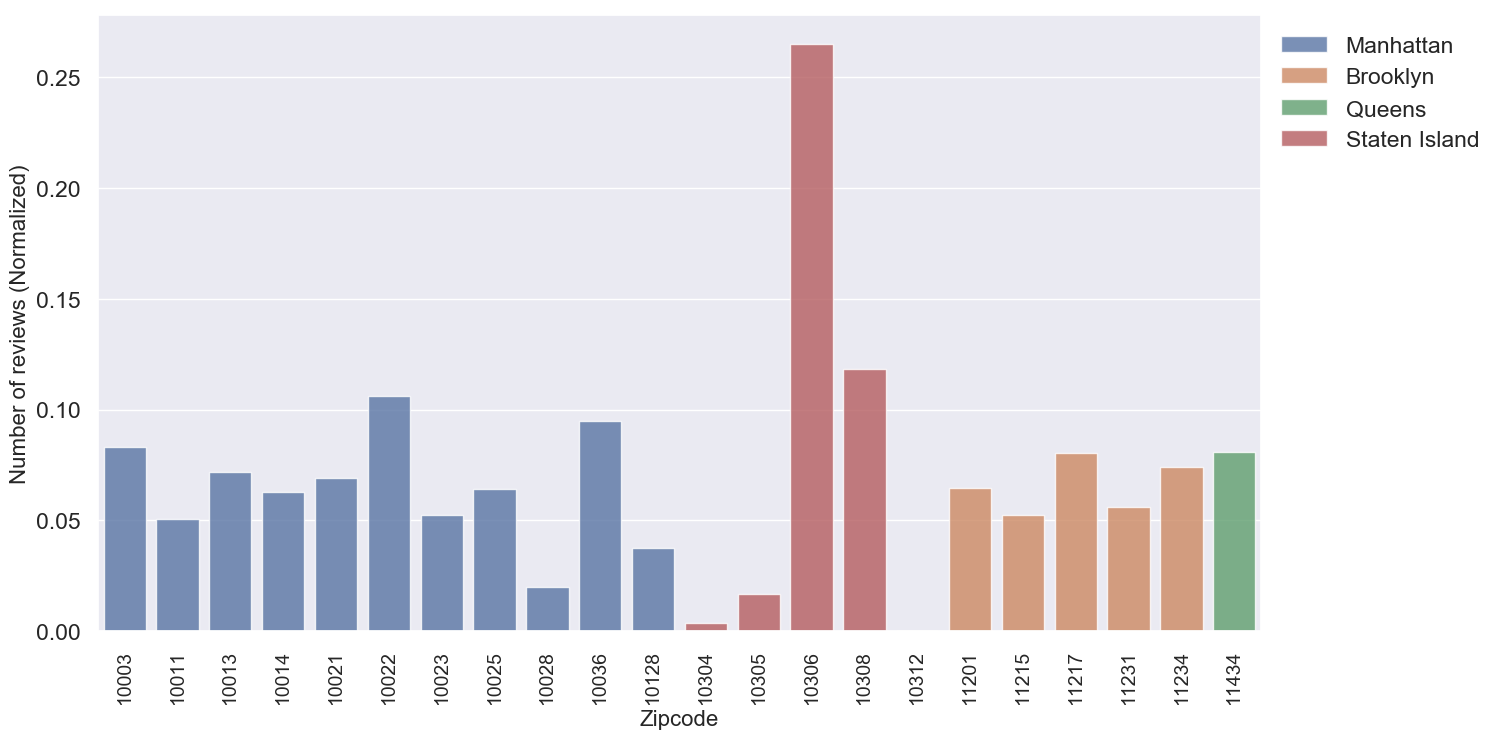

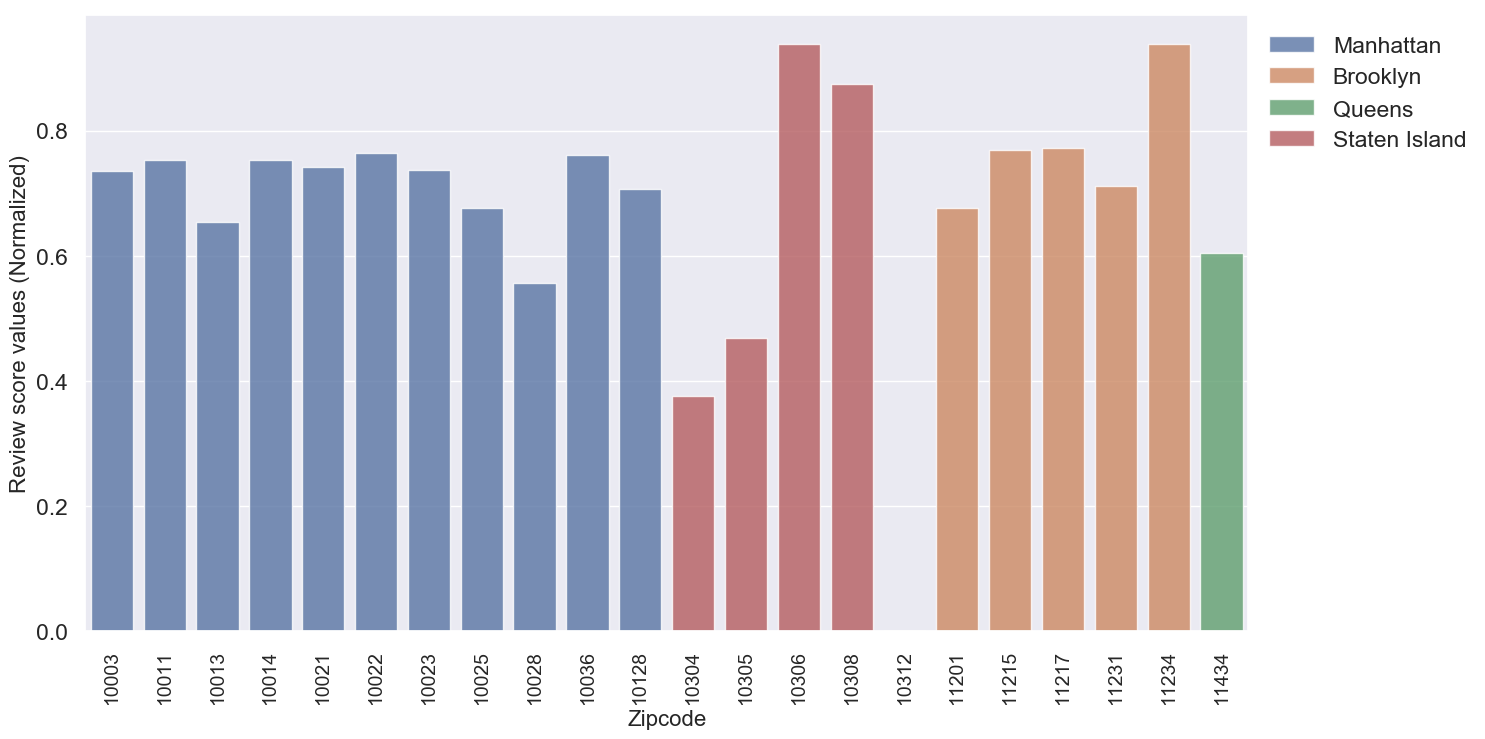

In [73]:
new_df = copy.deepcopy(merged_df[['zipcode','id','nr_norm','rsv_norm','neighbourhood_group_cleansed']])
new_df = new_df.assign(avg_nr_norm = new_df.groupby(['zipcode'])['nr_norm'].transform('mean')) 
new_df = new_df.assign(avg_rsv_norm = new_df.groupby(['zipcode'])['rsv_norm'].transform('mean')) 
new_df = new_df[['zipcode','avg_nr_norm','avg_rsv_norm','neighbourhood_group_cleansed']].drop_duplicates()
fig, ax4 = plt.subplots(1, figsize=(15,8))
sns.set(font_scale=1.5)
g = sns.barplot(ax=ax4,data=new_df, y="avg_nr_norm", x="zipcode",hue='neighbourhood_group_cleansed',ci=None,dodge=False,alpha=0.8)
ax4.set_xlabel('Zipcode', fontsize=16)
ax4.set_ylabel('Number of reviews (Normalized)',fontsize=16)
plt.xticks(rotation='vertical',fontsize=14)
ax4.legend(bbox_to_anchor=(1.0, 1.0))

fig, ax5 = plt.subplots(1, figsize=(15,8))
sns.set(font_scale=1.5)
g = sns.barplot(ax=ax5,data=new_df, y="avg_rsv_norm", x="zipcode",hue='neighbourhood_group_cleansed',ci=None,dodge=False,alpha=0.8)
ax5.set_xlabel('Zipcode', fontsize=16)
ax5.set_ylabel('Review score values (Normalized)',fontsize=16)
plt.xticks(rotation='vertical',fontsize=14)
ax5.legend(bbox_to_anchor=(1.0, 1.0))

**We have plotted the normalized number of reviews against zip codes, and the normalized review scores values against zip codes next to each other to see how popular the zip codes are among the customers. Zip codes which have higher number of reviews and more positive reviews, tend to be more popular to attract new customers. From this, it is verified that the zipcodes that we had chosen above are popular among customers, and also provide good returns on investments. However, 10028 zipcode does not seem to be that popular compared to the others in Manhattan. So, we are removing that from our consideration. The zipcodes that we are looking at right now after all the analysis are: 10021, 10022, 10023, 10025, 10128 from Manhattan, 11201, 11217, 11231, and 11234 from Brooklyn, and 10304 from Staten Island**

**It is understood that Manhattan and Brooklyn have high cost of properties, however, at the same time they are widely popular for short term rentals, so Zillow will definitely make profits in those areas after a few years, provided they maintain their services well and cater well to the needs of their customers. We have assumed that short term rentals mean the daily rentals, so to recoup their investments sooner, Zillow should start off by investing in the properties where the prices per night are higher. Because the reviews are so good, and occupancies are high, it can be safely inferred that the higher prices are not driving away the customers**

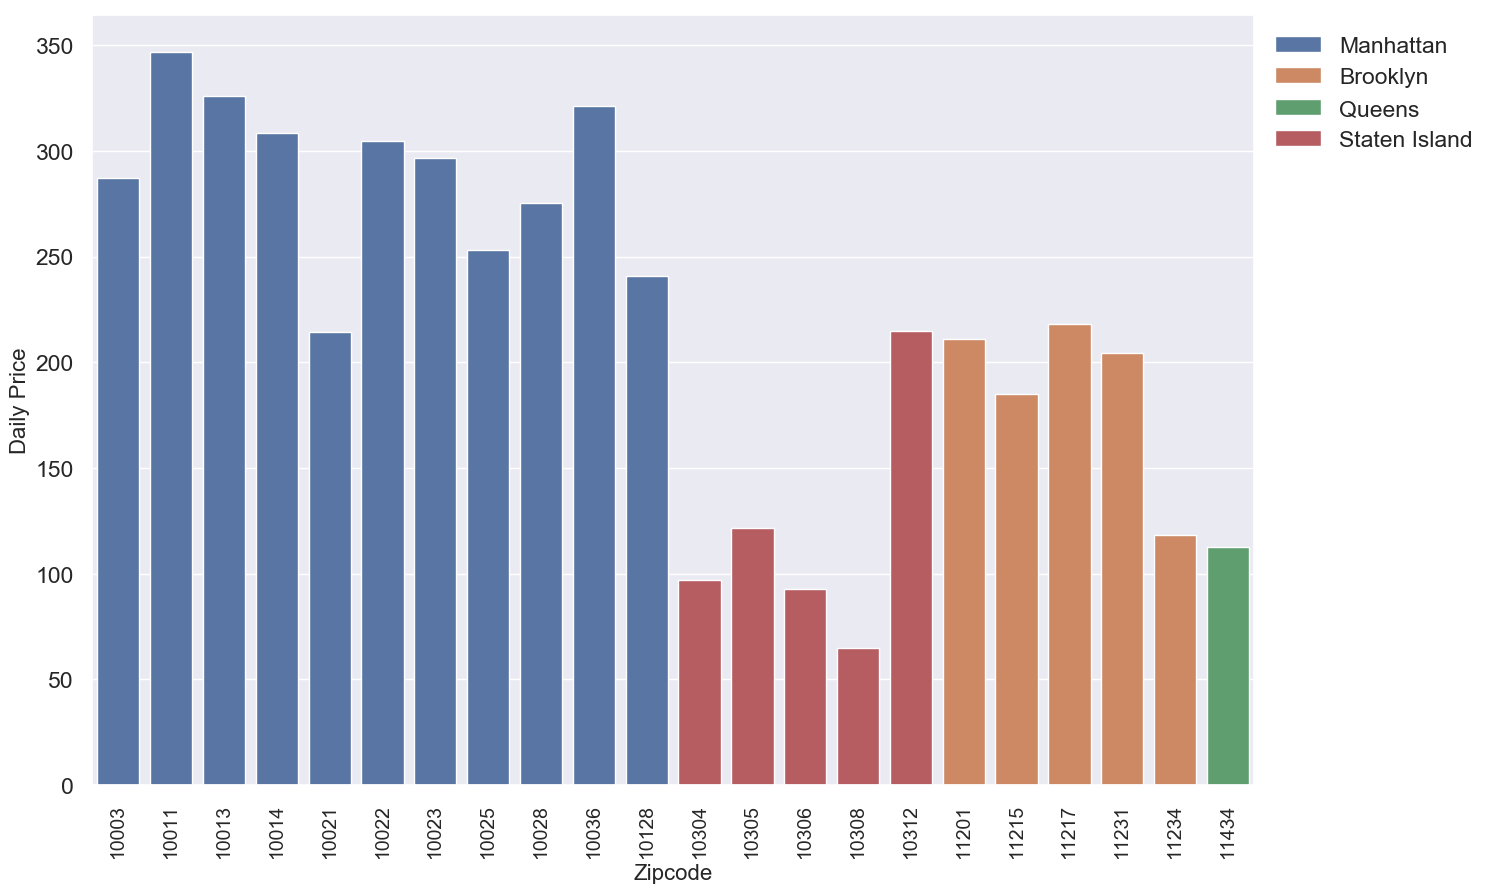

In [74]:
fig, ax3 = plt.subplots(1,1, figsize=(15,10))
sns.set(font_scale=1.5)
sns.barplot(ax=ax3,data=merged_df, x="zipcode", y="price", hue="neighbourhood_group_cleansed",ci=None, dodge=False)
plt.xticks(rotation='vertical',fontsize=14)
ax3.set_xlabel('Zipcode', fontsize=16)
ax3.set_ylabel('Daily Price',fontsize=16)
ax3.legend(bbox_to_anchor=(1.0, 1.0))

**Comparing the daily rates with each zip code, it is observed that almost all properties in Manhattan have higher prices than those in other neighbourhoods. After cross-referencing these property prices with those generating maximum revenue, we have decided to drop 10021 and 10128 from Manhattan, and 11234 from Brooklyn as they have lower listed price. So, now we have 10022, 10023, 10025 from Manhattan, 11201, 11217, 11231 from Brooklyn, and 10304 from Staten Island**

**To visualize relation between ratings given to listings and their listed price, we have created a scatter plot**

Text(66.35968749999998, 0.5, 'Price (in USD)')

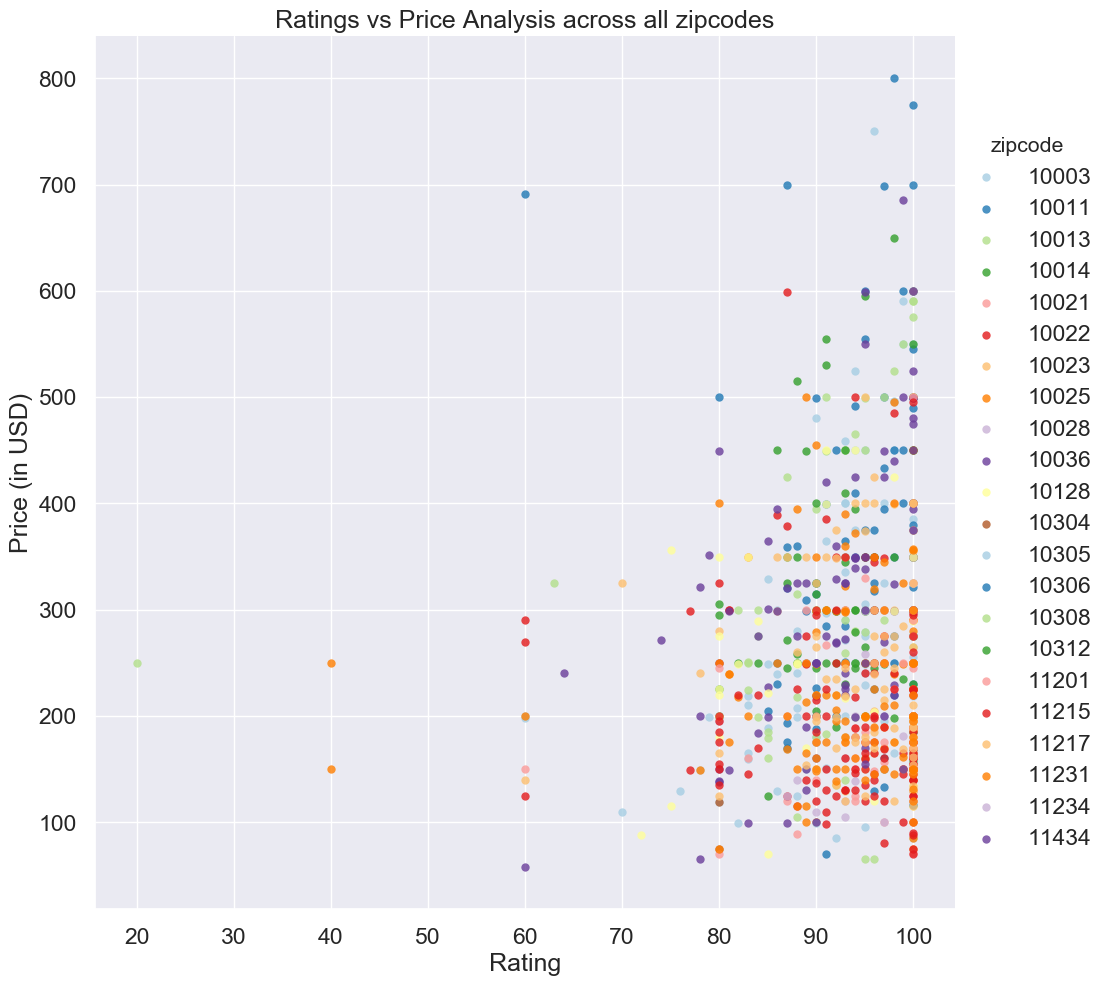

In [75]:
sns.set(font_scale=1.5)
sns.lmplot(x="review_scores_rating", y="price", data=merged_df, fit_reg=False, hue='zipcode', legend=True, palette="Paired", height=10)
plt.title("Ratings vs Price Analysis across all zipcodes")
plt.xlabel('Rating')
plt.ylabel('Price (in USD)')

**From the above graph, it is observed that there is no correlation between daily price of a property and the ratings received. Most of the ratings lie between 80-100, irrespective of price or zip code. So, this is not something we need to incorporate in our analysis** 

**Now that we have analyzed all the various indicators of profitability, we have 7 zipcodes that look like creditable options to invest in. We cross-check these zip codes with their occupancy rates that we had plotted above, and observe that 10022 has 58.27% occupancy, and 11231 has 64.86% occupancy. The rest have more than 70% occupancy.<br>
So, as our final recommendation, we would remove these two.<br> 
Zillow should invest in 10023, 10025 from Manhattan, 11201, 11217 from Brooklyn, and 10304 from Staten Island to have maximum returns on their investments**